# EDA

In [ ]:
print("hello")

: 

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

notebooks_dir = Path.cwd()
project_dir = notebooks_dir.parent
data_dir = project_dir / 'data' / 'raw'
text_data_path = data_dir / 'Subtask_2_train.json'

: 

In [ ]:
text_data = json.loads(text_data_path.read_text())
for i in range(len(text_data[0]['conversation'])):
    print(text_data[0]['conversation'][i])

: 

In [6]:
conversation_count = len(text_data)
utterance_count = [len(text_data[i]['conversation']) for i in range(conversation_count)]

print(f"Number of conversations: {conversation_count}")
print(f"Total number of utterances: {np.sum(utterance_count)}")
print(f"Average conversation length (number of utterances): {np.mean(utterance_count):.4f}")
print(f"Min conversation length (number of utterances): {np.min(utterance_count)}")
print(f"Max conversation length (number of utterances): {np.max(utterance_count)}")
print(f"SD conversation length (number of utterances): {np.std(utterance_count):.4f}")


Number of conversations: 1374
Total number of utterances: 13619
Average conversation length (number of utterances): 9.9119
Min conversation length (number of utterances): 1
Max conversation length (number of utterances): 33
SD conversation length (number of utterances): 5.6459


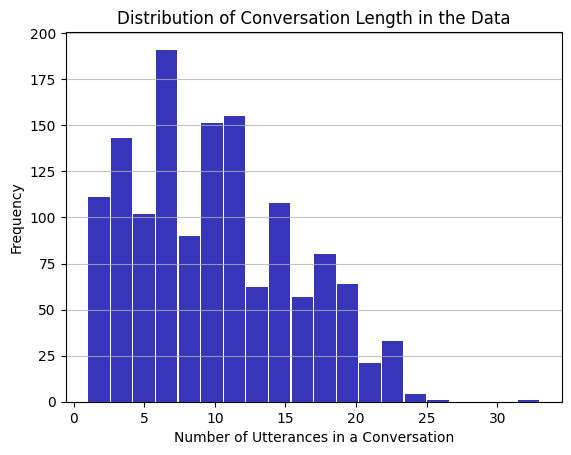

In [7]:
plt.hist(x=utterance_count, bins='auto', color='#0504aa', alpha=0.8, rwidth=0.95)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Number of Utterances in a Conversation')
plt.ylabel('Frequency')
plt.title('Distribution of Conversation Length in the Data')
plt.show() 

In [8]:
speakers = {}
for i in range(len(text_data)):
    for j in range(len(text_data[i]['conversation'])):
        speaker = text_data[i]['conversation'][j]['speaker']
        if speaker not in speakers:
            speakers[speaker] = 1
        else:
            speakers[speaker] += 1
        
print(f"Number of speakers: {len(speakers)}")
sorted_speakers = {key:speakers[key] for key in sorted(speakers, key=speakers.get, reverse=True)}
print(sorted_speakers)

Number of speakers: 312
{'Joey': 2044, 'Ross': 2026, 'Rachel': 1950, 'Phoebe': 1779, 'Monica': 1767, 'Chandler': 1737, 'Janice': 84, 'Tag': 60, 'Carol': 59, 'Emily': 59, 'All': 52, 'Mona': 46, 'Doug': 44, 'Joanna': 38, 'Frank': 37, 'Pete': 37, 'Susan': 34, 'Woman': 34, 'Mark': 34, 'Paul': 31, 'Richard': 31, 'Gunther': 29, 'Mr. Treeger': 27, 'Mr. Geller': 26, 'Phoebe Sr': 26, 'Mrs. Geller': 24, 'Julie': 24, 'Danny': 24, 'Elizabeth': 23, 'Gary': 22, 'Director': 21, 'Mike': 21, 'Guy': 19, 'Man': 19, 'Lydia': 18, 'Eric': 18, 'Chip': 18, 'David': 18, 'Dr. Green': 18, 'Earl': 17, 'Barry': 16, 'Jill': 15, 'Nurse': 15, 'Steve': 15, 'Chloe': 15, 'Kate': 15, 'Dana': 15, 'Dina': 15, 'Leslie': 14, 'Bonnie': 14, 'Janine': 14, 'Charlie': 14, 'Mr. Tribbiani': 13, 'Joshua': 13, 'Kim': 13, 'The Casting Director': 13, 'Ben': 13, 'Kristen': 13, 'Cassie': 13, 'Dr. Long': 13, 'Julio': 12, 'Katie': 12, 'Russell': 12, 'Cliff': 12, 'Bob': 11, 'Duncan': 11, 'Issac': 11, 'Mischa': 11, 'Kathy': 11, 'Tour Guide':

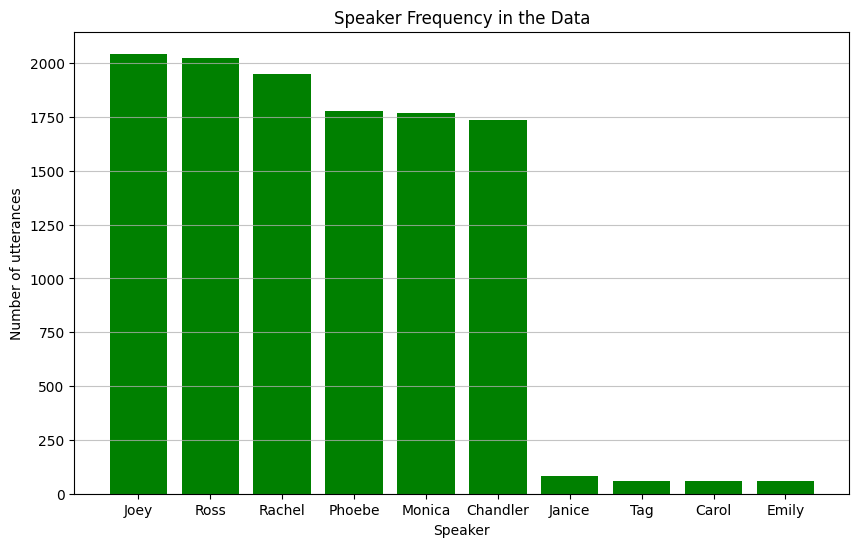

In [9]:
first_ten = dict(list(sorted_speakers.items())[:10])
plt.figure(figsize=(10,6))
plt.grid(axis='y', alpha=0.75)
plt.bar(first_ten.keys(), first_ten.values(), color='g')
plt.xlabel('Speaker')
plt.ylabel('Number of utterances')
plt.title('Speaker Frequency in the Data')
plt.show()

In [10]:
conv_word_count = []
for i in range(len(text_data)):
    word_count = 0
    for j in range(len(text_data[i]['conversation'])):
        text = text_data[i]['conversation'][j]['text']
        count = len(text.split())
        word_count += count
    conv_word_count.append(word_count)

In [11]:
print(f"Total number of words: {np.sum(conv_word_count)}")
print(f"Mean number of words in a conversation: {np.mean(conv_word_count):.4f}")
print(f"Min number of words in a conversation: {np.min(conv_word_count)}")
print(f"Max number of words in a conversation: {np.max(conv_word_count)}")
print(f"SD number of words: {np.std(conv_word_count):.4f}")

Total number of words: 153141
Mean number of words in a conversation: 111.4563
Min number of words in a conversation: 2
Max number of words in a conversation: 529
SD number of words: 68.7284


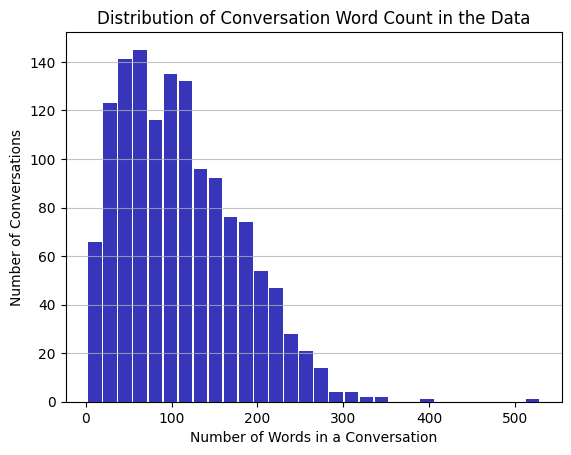

In [12]:
plt.hist(x=conv_word_count, bins='auto', color='#0504aa', alpha=0.8, rwidth=0.9)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Number of Words in a Conversation')
plt.ylabel('Number of Conversations')
plt.title('Distribution of Conversation Word Count in the Data')
plt.show() 

In [ ]:
utter_word_count = []
for i in range(len(text_data)):
    word_count = 0
    for j in range(len(text_data[i]['conversation'])):
        text = text_data[i]['conversation'][j]['text']
        count = len(text.split())
        word_count += [count]
    conv_word_count.append(word_count)

print(utter_word_count)

: 

In [9]:
emotions = {}
for i in range(len(text_data)):
    for j in range(len(text_data[i]['conversation'])):
        emotion = text_data[i]['conversation'][j]['emotion']
        if emotion not in emotions:
            emotions[emotion] = 1
        else:
            emotions[emotion] += 1

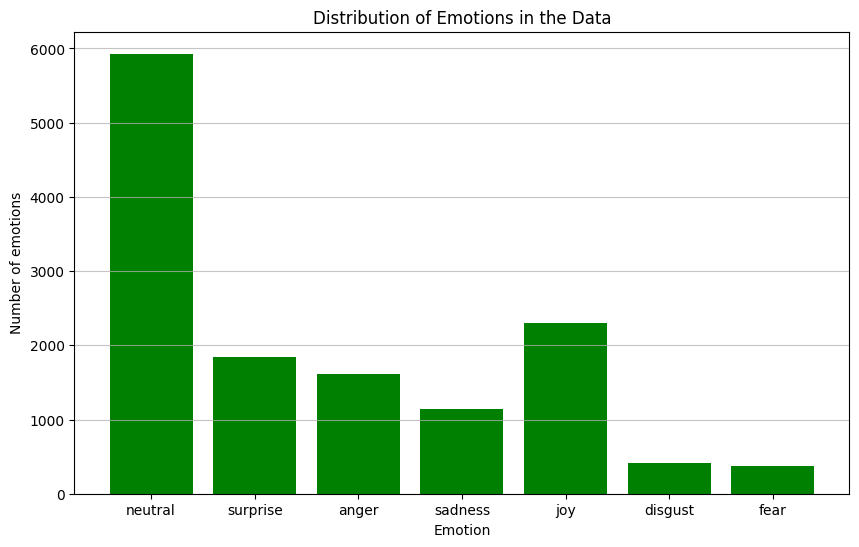

In [10]:
plt.figure(figsize=(10,6))
plt.grid(axis='y', alpha=0.75)
plt.bar(emotions.keys(), emotions.values(), color='g')
plt.xlabel('Emotion')
plt.ylabel('Number of emotions')
plt.title('Distribution of Emotions in the Data')
plt.show()

# AUDIOS

In [3]:
import tarfile
import os

mp4_path = data_dir / 'train_1.tar.gz'
interim_dir = project_dir / 'data' / 'interim'

In [14]:
#tar = tarfile.open(mp4_path)
#tar.extractall(interim_dir)
#tar.close()

In [ ]:
from moviepy.editor import *

def convert_video_to_audio(video_file_path, audio_file_path):
    video = VideoFileClip(str(video_file_path))
    video.audio.write_audiofile(str(audio_file_path))

for filename in os.listdir(interim_dir / 'train'):
    f = os.path.join(interim_dir / 'train', filename)
    new_filename = filename[:-3] + 'mp3'
    g = interim_dir / 'train_mp3' / new_filename
    if os.path.isfile(f) and not g.is_file():
        convert_video_to_audio(f, g)


In [11]:
from moviepy.editor import *

def convert_video_to_audio(video_file_path, audio_file_path):
    video = VideoFileClip(str(video_file_path))
    video.audio.write_audiofile(str(audio_file_path))

for filename in os.listdir(interim_dir / 'train'):
    f = os.path.join(interim_dir / 'train', filename)
    new_filename = filename[:-3] + 'wav'
    g = interim_dir / 'train_wav' / new_filename
    if os.path.isfile(f) and not g.is_file():
        convert_video_to_audio(f, g)

MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia131utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1102utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia360utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia394utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia440utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1366utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia104utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia14utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia911utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia218utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia777utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia783utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia538utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia119utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia114utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia356utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia450utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia130utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia370utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1319utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia644utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia528utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1330utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia208utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia946utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia19utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia751utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia478utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia637utt17.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia629utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia205utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia741utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1203utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia525utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia479utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia389utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia450utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1134utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1035utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia437utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia506utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia835utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1163utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia653utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia244utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia966utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1282utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia63utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia97utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1242utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1165utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia427utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia997utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia825utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1283utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia104utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia976utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia839utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia73utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia87utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia3utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia254utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia296utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1000utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia45utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia465utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1264utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1290utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1178utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia784utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1280utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia55utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia272utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia736utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia803utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1168utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia785utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia115utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia904utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia853utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia594utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia371utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia385utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1113utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1040utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia209utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1328utt23.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1210utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia361utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1103utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia905utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia105utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia70utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia776utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia782utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1050utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia740utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1229utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia524utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia926utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia638utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1004utt20.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1351utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia357utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1135utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia613utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia570utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1239utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1114utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia347utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1125utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia382utt20.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia717utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia628utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1372utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia123utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia45utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia149utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia642utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1224utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia824utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia426utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia427utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1253utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia575utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia581utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia72utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1037utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia255utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia930utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia59utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia834utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia669utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia436utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia44utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia652utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia245utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia243utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia565utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1243utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1121utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia258utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1275utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia54utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia544utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia578utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1108utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia273utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1347utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia690utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia400utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia802utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia147utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1109utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia723utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia263utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia248utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia44utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1265utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia410utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1336utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia146utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia812utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia674utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1073utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia249utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1217utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia36utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1344utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia496utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1206utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1049utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia369utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia860utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia606utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia611utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1207utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1063utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1097utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia248utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia201utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia14utt19.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia472utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia486utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia180utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1354utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia884utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia379utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia303utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia444utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia871utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia493utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia165utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia803utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia620utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia284utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1103utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1231utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia10utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1359utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia82utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia686utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia856utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia454utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1221utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia748utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1045utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia227utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1159utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1102utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia546utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia709utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1232utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia53utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1157utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia926utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia732utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia656utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia954utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia719utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia141utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia695utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia325utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1147utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia418utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia177utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1315utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia688utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia996utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1009utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia560utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia594utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia167utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1305utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia698utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia303utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1161utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia735utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia408utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1289utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia714utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1032utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia986utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1019utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia570utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia27utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1206utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1062utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1096utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia127utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia871utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1072utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia754utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia340utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia861utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia368utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia463utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia631utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1117utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia979utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia888utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia857utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia621utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia904utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia25utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia847utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1107utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia898utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia621utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia236utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia446utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1230utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia11utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia283utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia955utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia140utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1146utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia945utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia429utt23.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia538utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia723utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia806utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia86utt19.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1319utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1016utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia63utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia391utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia699utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia562utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1270utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia585utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia76utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia82utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia973utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia987utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia614utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia890utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1170utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1184utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia312utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia689utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1314utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia176utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia432utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia595utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia66utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia92utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia963utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia997utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia965utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia432utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia176utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1314utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia689utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia312utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1170utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1184utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia890utt19.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia614utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia419utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia965utt17.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia963utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia997utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia66utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia92utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia561utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1270utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia562utt21.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia409utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia699utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia63utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1016utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia973utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia987utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia76utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia82utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia571utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1288utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia723utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia267utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia538utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia429utt22.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia945utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1332utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1319utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia86utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia334utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia510utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia955utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia277utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia324utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1146utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia140utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1322utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia621utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia898utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1107utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia11utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1230utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia446utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1054utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia236utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia888utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia979utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1117utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia631utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1044utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia25utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia904utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia621utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia340utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia754utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1072utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia607utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia525utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia463utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia368utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia861utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia127utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1062utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1096utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1206utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia27utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1168utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia871utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia617utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia408utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia303utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia698utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1305utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia193utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia570utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia344utt18.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia972utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1032utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia714utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1289utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia688utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1315utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia418utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia560utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia594utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia719utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia954utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia656utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1147utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia325utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia695utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia141utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia53utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1232utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia709utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia546utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia926utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1157utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia335utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia856utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia686utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia82utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1359utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1102utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1159utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia227utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1045utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia748utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1221utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia620utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia165utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia493utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia871utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia303utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1231utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia729utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1103utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia284utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia248utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1063utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1097utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia913utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia884utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1354utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia180utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia472utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia486utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia14utt18.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia36utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia249utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1073utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia611utt18.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia606utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia860utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1206utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia496utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1344utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1291utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia44utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia248utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia297utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia723utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1109utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia674utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia812utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia146utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1336utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia410utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1347utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia287utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1108utt17.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia578utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia544utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia54utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia258utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1121utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia147utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia802utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia400utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia690utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia652utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia669utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia834utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1243utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia565utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia243utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia245utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia427utt17.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia824utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1224utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia642utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia149utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia45utt17.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia59utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia930utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia255utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1037utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia86utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia575utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia581utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1253utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1239utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia123utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1372utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia382utt21.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1125utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia347utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1114utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia926utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia524utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1229utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia570utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia613utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1135utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia357utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1351utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1004utt21.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia905utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia868utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia361utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1050utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia776utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia782utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia70utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia910utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia371utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia385utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia878utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia594utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia853utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia904utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1210utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1328utt22.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia209utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1040utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia736utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia272utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia55utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1280utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia785utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1168utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia803utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia665utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia201utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia465utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1264utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1290utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia45utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1000utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia296utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia675utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia784utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1178utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia997utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia427utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1165utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1036utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia254utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia3utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia73utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia87utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia839utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia976utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia104utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1283utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia158utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1175utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia653utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1163utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia506utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia437utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia63utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia97utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1282utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia966utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia992utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1026utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia244utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia525utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1203utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia741utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia205utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1228utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1035utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia356utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia450utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1134utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia389utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia479utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1350utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia751utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia19utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1238utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia946utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia629utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia637utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1340utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia346utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia370utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia130utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia450utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia356utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia114utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia119utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia208utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia755utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia503utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1330utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia528utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1319utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia104utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1366utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia440utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia360utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia394utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1102utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia131utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia538utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia777utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia783utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia218utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia911utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia14utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia513utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1319utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1330utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia503utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia208utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia755utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia119utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia130utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia370utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia513utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia911utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia218utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia754utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia777utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia783utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia131utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia360utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1102utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia104utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia825utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1366utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1350utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia479utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia482utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia356utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1134utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia450utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1228utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia741utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia525utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia346utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1124utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia466utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1340utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia637utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia946utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1238utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia19utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia104utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1283utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia839utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1252utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia73utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia87utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1036utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia254utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia427utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia997utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1162utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia825utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia700utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1026utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia244utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1282utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia63utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia97utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1242utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia437utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia506utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1163utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia835utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia678utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia653utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia158utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia828utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia201utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia665utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1168utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia785utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1280utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia55utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia272utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1178utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia863utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia784utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia675utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1153utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1000utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia45utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1264utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1290utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia70utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia219utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia910utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia59utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia782utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1103utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia361utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia868utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia905utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia105utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1076utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia209utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1328utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1210utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia115utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia904utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia594utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1113utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia878utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia371utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia385utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia108utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1114utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia347utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia865utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia382utt23.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia628utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1372utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1076utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1239utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia638utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia881utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1351utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia607utt20.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia357utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia570utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia740utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1229utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia524utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia926utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia243utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1268utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia834utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia669utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia436utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia44utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia652utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia316utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia72utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia86utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1037utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia930utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1278utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia641utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia149utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia45utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1224utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia642utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia427utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia426utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia812utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia674utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1109utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia723utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia263utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia297utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia543utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1265utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1291utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia853utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia690utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia802utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia147utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1121utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1275utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia544utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1108utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia273utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia287utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1347utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia459utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia486utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia180utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia884utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia379utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia913utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia521utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1207utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia248utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia908utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia201utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1063utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1097utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1206utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia496utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1049utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia369utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia860utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia894utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia606utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia449utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia249utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1073utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia582utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1217utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia748utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1045utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1102utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia82utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia370utt18.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia686utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia380utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia856utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1291utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia454utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1372utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1103utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia284utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia10utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1362utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia303utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia871utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia444utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia165utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia83utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia620utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1198utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia325utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia732utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia521utt20.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia656utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia556utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia954utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia926utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1188utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia546utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1054utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1004utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1232utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia53utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1289utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia7utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia986utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia570utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1305utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia167utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia193utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia698utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia647utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1161utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia303utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia408utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1009utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia996utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia560utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia594utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia337utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1269utt20.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1351utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia418utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1315utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia177utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia688utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia368utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia127utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia463utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia497utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1121utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia607utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1072utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia340utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia617utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1131utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia487utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia27utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1206utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1049utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1062utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia127utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1054utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia446utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia236utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia772utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1230utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia847utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia621utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia621utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia25utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1220utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1244utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia762utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia796utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia631utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia979utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia857utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia334utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia806utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1081utt19.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1332utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia945utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia429utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia40utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia538utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia723utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia404utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia140utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1322utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia324utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1146utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia955utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia510utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia561utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia595utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia963utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia997utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia965utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia419utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia614utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia312utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1170utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1184utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia689utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia339utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1314utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia184utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1203utt18.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia571utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia585utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1257utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia973utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia987utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia329utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1016utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia699utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia185utt18.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia409utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1270utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia973utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia987utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1257utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia571utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia585utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1288utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia715utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1270utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia562utt22.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia409utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia185utt19.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia699utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1016utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia329utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia965utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia963utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia997utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia561utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia595utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1203utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia184utt19.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia176utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia339utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia689utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1170utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1184utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia614utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia419utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1146utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia324utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1322utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia140utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia404utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia510utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia955utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1332utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1081utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia150utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia806utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia334utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia723utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia538utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia40utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia429utt21.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia945utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia762utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia796utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1220utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1244utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia25utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia621utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia857utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1358utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia979utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1230utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia236utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1054utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia847utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia487utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia871utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1131utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia617utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia127utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1096utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1049utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1206utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia27utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia607utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1121utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia463utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia127utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia368utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia861utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia340utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia337utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia560utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia594utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia996utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1009utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia177utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1315utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia418utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia570utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia972utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia336utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia714utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia7utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1289utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia408utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia303utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1161utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia647utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia167utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia193utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1305utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1188utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1157utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia53utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1232utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1004utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1054utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia546utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia325utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1147utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia141utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1198utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia656utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia521utt21.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia732utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia10utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1231utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia284utt17.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1103utt17.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia620utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia83utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia165utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia444utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia871utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1362utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia303utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1102utt17.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1045utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia227utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia748utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1221utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1372utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia454utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1291utt19.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia856utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia380utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia686utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia82utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia370utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1359utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia449utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia606utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia860utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia369utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1049utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1206utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia36utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1217utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1073utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1087utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia249utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1048utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia66utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia379utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia884utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia472utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia459utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia404utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1063utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1097utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia201utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia908utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia248utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia521utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia913utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia147utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia802utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia400utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia690utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1347utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia273utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia287utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia578utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1108utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia544utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia54utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1275utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1121utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia812utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia146utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia410utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1265utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1291utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia543utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia44utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia263utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia297utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia568utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia723utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1109utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1278utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia930utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia255utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia72utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia86utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1253utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia426utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia427utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia642utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1224utt17.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia45utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia149utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia641utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1243utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1268utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia243utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia245utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia316utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia652utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia44utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia436utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia669utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia834utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia570utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia357utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1135utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia607utt21.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1351utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia881utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1004utt22.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia638utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia524utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1229utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia740utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia123utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1372utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia628utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia382utt22.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia865utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia347utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1125utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1114utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia108utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1239utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1076utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1210utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1328utt21.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia209utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia371utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia385utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia878utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1113utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia594utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia904utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia115utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia776utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia910utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia219utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia70utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia105utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia905utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia868utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia361utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1103utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1153utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia675utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia784utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia863utt21.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1264utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1290utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia45utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia785utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia803utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia665utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia201utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia828utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia272utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1139utt20.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia55utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1280utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1242utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia63utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1282utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia244utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1026utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia700utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia158utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1305utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia678utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia835utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1163utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia506utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia437utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia254utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1036utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia3utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia73utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia87utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia839utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1252utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1283utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia104utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia825utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1162utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia997utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia427utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia637utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1340utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia466utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1124utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia346utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia751utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1238utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia946utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1134utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia450utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia356utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia482utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1350utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia479utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia741utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1228utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia777utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia783utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia754utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia911utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia513utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia825utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia104utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1102utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia394utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia755utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia503utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1330utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1319utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia689utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia130utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia119utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia741utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1093utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia525utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia479utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia874utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia639utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia356utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia450utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia119utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1035utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia937utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia946utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia19utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1238utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1083utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia751utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia346utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1340utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia33utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia629utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia890utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia637utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia119utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia356utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia114utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia130utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia370utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1319utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia503utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1330utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia208utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia131utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia869utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia360utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia394utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1102utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia325utt18.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia624utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia104utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1366utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia825utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia513utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia911utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia218utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia783utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1280utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1267utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia272utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia665utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1168utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia803utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1000utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia296utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia887utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia465utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1264utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1290utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia387utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1178utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia427utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia748utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia825utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1139utt18.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia997utt17.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia104utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1283utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia73utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia87utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia839utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia3utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1036utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia437utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1163utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia653utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia158utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1269utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1026utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1282utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia863utt19.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia63utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia97utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1093utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia33utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1239utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1114utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1125utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia347utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia123utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia467utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia493utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1372utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia740utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1229utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia524utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia926utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia638utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1351utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1328utt19.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia570utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1135utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia357utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1103utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia361utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia868utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1367utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia105utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia70utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia219utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia910utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia232utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia782utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia412utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1113utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia878utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia371utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia607utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1076utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia209utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1210utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1224utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1109utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia723utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia263utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia297utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1265utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1291utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia44utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia410utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia146utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia839utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia674utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia680utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1121utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia54utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia544utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1275utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1108utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1347utt17.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia287utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia853utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia690utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia829utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia400utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia144utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia147utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia679utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia834utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia640utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1031utt18.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia44utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia652utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia243utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1243utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia149utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia45utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia641utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1224utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia642utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia824utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia669utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia427utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia426utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia72utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia86utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1253utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia930utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia711utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia255utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1037utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1359utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia686utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia82utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia856utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia454utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1221utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1364utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia748utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia227utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1045utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia763utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1102utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia14utt23.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia444utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia303utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia620utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia773utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia787utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1103utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia284utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1231utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia700utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1048utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia923utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia913utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia248utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia201utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1063utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1130utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia136utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia472utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia486utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1048utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia884utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia249utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1073utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia582utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia36utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1217utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia496utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia894utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1049utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia606utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1305utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia193utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia698utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1161utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia521utt19.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia303utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia408utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia735utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia714utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia570utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1351utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia418utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1315utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia338utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia688utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1009utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia560utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia594utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia240utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia732utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia656utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia556utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia389utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia954utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia141utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia405utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1147utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia255utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia325utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia546utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia41utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia388utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1232utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1269utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia926utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1157utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia335utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1363utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia847utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia621utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia391utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia609utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1054utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia11utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia979utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia631utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia857utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia25utt17.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia621utt17.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1072utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1216utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia861utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia368utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia497utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia607utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia525utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1206utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia520utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1062utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1096utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia200utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia127utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia458utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia617utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia871utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia487utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia614utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia656utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia312utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1170utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1184utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia689utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia429utt19.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia176utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1314utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia561utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia595utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1081utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia963utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia997utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1008utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia965utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia699utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1016utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia409utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1270utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia646utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia964utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia6utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia585utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia973utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia987utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia945utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1203utt21.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia777utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia723utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1005utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia538utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1332utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1189utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia955utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia510utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia806utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia324utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia510utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1146utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia324utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia806utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia140utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia538utt17.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1005utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia723utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia777utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia184utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1203utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1189utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1332utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia150utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1156utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia646utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1270utt17.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia409utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia192utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1016utt17.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia973utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia987utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia585utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia6utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia715utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia964utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1258utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1314utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia176utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia429utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1170utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1184utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia312utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia656utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia614utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia965utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1008utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia963utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia997utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1081utt21.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia561utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia595utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia127utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1062utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1096utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia27utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia520utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1206utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia871utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia617utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia458utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1216utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia37utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1072utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia525utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia607utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia463utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia368utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia861utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia857utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1373utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1358utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia631utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia979utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1220utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia621utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia25utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1348utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia391utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia621utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia847utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1363utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1230utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia11utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia236utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1054utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia609utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia888utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1269utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1232utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia388utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia41utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia335utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1157utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia926utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia954utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia389utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia656utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia732utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia325utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia255utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1147utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia405utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia141utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia688utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia338utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia418utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1351utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia240utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1299utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia560utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia594utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia996utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1009utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia735utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia408utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia521utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1161utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia698utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia193utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia570utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia714utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1289utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1217utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia36utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia582utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1087utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia249utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia606utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1049utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia860utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia369utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia496utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1206utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia370utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1097utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia201utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia248utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia908utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia913utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia923utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1048utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia870utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1048utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia472utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia486utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia136utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia303utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia444utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia871utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia700utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1231utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia284utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1103utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia611utt22.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia773utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia787utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia454utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia856utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia82utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia686utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1359utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1102utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia14utt22.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia763utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1045utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia227utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1364utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1221utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia426utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia427utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia669utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia824utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1224utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia641utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia45utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia149utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia2utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1037utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia255utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia711utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia930utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1253utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia72utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia86utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia44utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia640utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia834utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia669utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia679utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1243utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia245utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia273utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia287utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1347utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1108utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1275utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia544utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia54utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1121utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia147utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia802utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia144utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia400utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia829utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia690utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia853utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia44utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1265utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1291utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia263utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia297utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1109utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia674utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia839utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia812utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia146utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia410utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia385utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1113utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1224utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1210utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1076utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia607utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia105utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia868utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia395utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1103utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia782utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia232utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia910utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia70utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia926utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1229utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia740utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia357utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1135utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia570utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1328utt18.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1351utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia638utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1239utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia33utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1093utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1372utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia467utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia493utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia123utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia347utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1125utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1114utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia158utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1163utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia437utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia506utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia63utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia97utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia863utt18.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1242utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1282utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia105utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia244utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1026utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1269utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia997utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1139utt19.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia825utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia748utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia427utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia254utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1036utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia90utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia3utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1252utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia839utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia73utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia87utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1283utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia104utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia387utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia45utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia465utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1264utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1290utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia569utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia296utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1000utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1178utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia579utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia272utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1267utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1280utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia55utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia552utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia803utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1168utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1366utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia825utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia104utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia624utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1102utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia360utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia394utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia869utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia131utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia777utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia218utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia911utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia513utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia370utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia130utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia114utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia356utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia119utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia208utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia503utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1319utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia767utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia751utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1083utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1238utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia19utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia946utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia637utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia890utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia629utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia33utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1340utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1124utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia346utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia525utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1093utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia741utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1035utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia119utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia450utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1134utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia356utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia639utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia874utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1124utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia346utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia602utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia41utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1340utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia629utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia33utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia637utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia937utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia946utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia19utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1238utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia751utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia479utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia639utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia612utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1134utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia450utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia356utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1035utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia644utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia741utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia525utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia513utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia777utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia783utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia131utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1102utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia360utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia842utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1129utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia825utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1366utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia104utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia357utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1319utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia503utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1330utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia208utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1139utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia119utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia356utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia114utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia130utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia856utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1112utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia370utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1178utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia331utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1264utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia465utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia45utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia193utt18.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia249utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia665utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia803utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1168utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia55utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1274utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia272utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia602utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia579utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia244utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1026utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1282utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1242utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia63utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia564utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia506utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia437utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia835utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1163utt17.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia158utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1283utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia104utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia73utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia574utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia839utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1252utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia3utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia254utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1036utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia427utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia825utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia997utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia388utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia638utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia570utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1135utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia740utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia524utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia926utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1114utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1125utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia123utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1372utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1212utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1093utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia214utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia529utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1076utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1004utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia209utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1210utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia904utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia115utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia878utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia371utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia385utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1113utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia219utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia910utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia70utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia382utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia15utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia412utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia782utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia361utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia868utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1103utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia105utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1367utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia905utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia690utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia853utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia400utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia802utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia147utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1121utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia54utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1275utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1108utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1347utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia273utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia287utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia410utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia146utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia812utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia680utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1109utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia263utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia297utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia727utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1265utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1291utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia44utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia72utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia86utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1253utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia977utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia930utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia255utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia2utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia45utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia641utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia642utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1224utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1164utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia824utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia426utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia427utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia162utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia243utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1243utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia669utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia834utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia186utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia436utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia44utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia652utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia611utt20.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia284utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1103utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia10utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1231utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia846utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia444utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia303utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia165utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia620utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1221utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1364utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia748utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia985utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia905utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia227utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia14utt20.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1102utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1359utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia686utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia82utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia856utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia454utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia496utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1206utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia369utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia860utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia894utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1049utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia755utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1073utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1087utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia249utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia582utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia36utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1217utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1159utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia472utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia486utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1048utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia884utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia913utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1063utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1097utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia908utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia248utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia201utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia745utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia996utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1009utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia93utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia594utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1351utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia734utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1315utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia688utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1289utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia714utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia83utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia167utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia193utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1305utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia698utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia303utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1161utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia735utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia926utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1157utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia546utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1232utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia266utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia141utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1308utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia255utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1147utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia732utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia656utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1270utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia556utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia954utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia25utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia621utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1220utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia506utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia631utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1358utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia857utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia609utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia236utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1054utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia11utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1230utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia847utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia621utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1348utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1355utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia617utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia378utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia871utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1355utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia487utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1206utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia27utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia200utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1062utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1096utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia127utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia861utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia368utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia463utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia497utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia607utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia525utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1216utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1033utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia715utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia571utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia585utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1018utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia987utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia699utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1016utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia409utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1270utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia561utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia595utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1008utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia997utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia86utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia948utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia965utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia614utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1170utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia312utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia830utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia689utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1314utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia176utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1322utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia140utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1146utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia324utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia562utt19.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia955utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia510utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia670utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1332utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia150utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia149utt18.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia945utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia708utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia777utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia723utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia538utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia149utt19.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia150utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1332utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia334utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia670utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia538utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia708utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia945utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia324utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1146utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia140utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1322utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia510utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia955utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia562utt18.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia965utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia948utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia963utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia561utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia595utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1314utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia689utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia830utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia312utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1184utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia614utt17.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia973utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia571utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia585utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia715utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1033utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia964utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1270utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia409utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia192utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1016utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia699utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia525utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia607utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia463utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia497utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia861utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia37utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1072utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia487utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1355utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia871utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia617utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia127utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia368utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1062utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1096utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1289utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia27utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1230utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1054utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia236utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia609utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1348utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia621utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia847utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia506utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1220utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia621utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia25utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia857utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1358utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia631utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia325utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia255utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1308utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia141utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia954utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia556utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1270utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia656utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia732utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1157utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia335utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia926utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia53utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia266utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1232utt17.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia546utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia570utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia83utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia714utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1289utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia408utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia735utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1161utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia303utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia698utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1305utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia167utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia193utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1299utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia560utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia93utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1009utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia996utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia688utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1315utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia418utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia734utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1351utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia884utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1048utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia472utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia486utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia745utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia201utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia248utt17.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia908utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1063utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1097utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia913utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia606utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1049utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia860utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia894utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia369utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1206utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia496utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1217utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia36utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia582utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia249utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1073utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1087utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia755utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia493utt20.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia14utt21.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1102utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia227utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1045utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia905utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia985utt19.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia748utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1364utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1221utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia454utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia82utt17.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia686utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1359utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1231utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia10utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1103utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia284utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia611utt21.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia620utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia165utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia303utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia444utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1243utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia243utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia652utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia44utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia640utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia186utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia669utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia2utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia255utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1037utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia930utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia977utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1253utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia72utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia86utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia162utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia427utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia426utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1164utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1224utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia642utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia641utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia149utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia45utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia674utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia812utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia146utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia410utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia44utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1265utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1291utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia727utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia263utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia297utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1109utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia147utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia802utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia400utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia853utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia273utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia287utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1347utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1108utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1275utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1121utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia782utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia412utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia15utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia70utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia382utt18.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia910utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia219utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia905utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia105utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1103utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia868utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia361utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1210utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia209utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1004utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1076utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia529utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1113utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia371utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia385utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia878utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia115utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia451utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia904utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1372utt17.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia123utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1125utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia347utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1114utt17.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1239utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia214utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1093utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1212utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1135utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia357utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia570utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1351utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia638utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia388utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia926utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia524utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1229utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia740utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1036utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia254utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia3utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia839utt17.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1252utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia574utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia87utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia104utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1283utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia997utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia825utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia564utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia590utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia97utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1242utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1282utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1026utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia244utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia158utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1163utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia835utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia506utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1168utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia803utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia665utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia579utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1267utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1280utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia55utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia675utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia331utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1178utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia249utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia387utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia193utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia45utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1290utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia465utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1000utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia296utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia208utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1330utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia503utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1319utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia767utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia370utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia856utt19.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia130utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia356utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia119utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1139utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia777utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia783utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia911utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia513utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia357utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia825utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1366utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia842utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia360utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia869utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia131utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia644utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1035utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia356utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1134utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia450utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia612utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia479utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1253utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia525utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia637utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1340utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia41utt18.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia602utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia346utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1124utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1238utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia19utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia946utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia68utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1249utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia697utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia93utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia946utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1094utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia544utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia153utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1155utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia337utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia956utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia53utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia554utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia860utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1095utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia8utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1259utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia78utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia730utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia92utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia738utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1317utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1173utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia311utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia706utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1244utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia562utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia596utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia269utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1163utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1197utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia301utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia258utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia165utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia191utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia76utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia970utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia984utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia252utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia884utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1215utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia34utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia788utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1071utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia518utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia168utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia849utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia141utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1109utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia460utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1340utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1061utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1369utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia798utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia140utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1119utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia470utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia945utt22.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia614utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia647utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia129utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia446utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia609utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1233utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia12utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia235utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1057utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia771utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia785utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia420utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia456utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia854utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia632utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia139utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia42utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia646utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia8utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia795utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia555utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia232utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia9utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia957utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia731utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1258utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1032utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia169utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia618utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia326utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia35utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1007utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia998utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia721utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia69utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1248utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia545utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia659utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia814utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1255utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1330utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia336utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia456utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1344utt21.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia644utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia300utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1162utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1196utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia164utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia190utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1306utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia985utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia573utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia587utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia180utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1316utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia822utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia819utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia136utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia268utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia961utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia995utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia563utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia597utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1094utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1006utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia522utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1204utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia485utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1118utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia873utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia887utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia974utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia380utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1214utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1070utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1084utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia207utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1108utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia863utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia897utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia457utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia138utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia633utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia529utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia383utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia103utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia128utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia367utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia393utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia528utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia623utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia907utt21.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia13utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1056utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1219utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia651utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia315utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia837utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1219utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia61utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia95utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia729utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia827utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia425utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia788utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia305utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia641utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia85utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1266utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia98utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia260utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia677utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia683utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia736utt18.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia438utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia655utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1219utt24.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia318utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia811utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia979utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia284utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1276utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1282utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia745utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia308utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia523utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia693utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1146utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia106utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1364utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia362utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia396utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1039utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia469utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia81utt23.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia781utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia913utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1078utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia511utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia372utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1110utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia479utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia903utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1068utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia795utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia791utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia753utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1081utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia537utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia935utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1173utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia344utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia527utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia987utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1091utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1314utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia771utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia490utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia354utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia305utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia877utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia424utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia640utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1329utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia257utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1035utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia560utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia713utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia738utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1251utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia549utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia70utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia84utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia84utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia650utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1339utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia434utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1083utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia707utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1241utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1104utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia561utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1025utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia271utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1013utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia266utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1277utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1283utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia56utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1296utt21.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia953utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia146utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia666utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia692utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1267utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1003utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia412utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia478utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia732utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1131utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia318utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1226utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia500utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1069utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia331utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia98utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1365utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia468utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1356utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1101utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia774utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia780utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia842utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia99utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia510utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia912utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia678utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia924utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia21utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia437utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia651utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia55utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia355utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia252utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia131utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia679utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia31utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia465utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia491utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1343utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia121utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia253utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia31utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia679utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia345utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia253utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1127utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia121utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1343utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia465utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia491utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia55utt17.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia651utt17.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia437utt17.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia21utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia924utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia678utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia131utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1353utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia252utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia355utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia397utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1101utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1356utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia468utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia510utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia842utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia99utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia774utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia780utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1131utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia387utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia478utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia98utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia331utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1069utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia500utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia318utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1226utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia968utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1267utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia412utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia319utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia810utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia676utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia189utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia953utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1296utt20.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia56utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1277utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1283utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia266utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia978utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia271utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia666utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia692utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia199utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia146utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1083utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia434utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1339utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia84utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1025utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia561utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1104utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1241utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia707utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1329utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia424utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia877utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1363utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia70utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia84utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia549utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1251utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia560utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1035utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia257utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1105utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia771utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia287utt18.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1314utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia987utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia527utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia130utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1136utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia354utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia490utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1173utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia537utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1081utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia753utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1126utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia344utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia120utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia479utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1110utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia372utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia765utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia795utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1068utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia903utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia469utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1039utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia362utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia396utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1364utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia106utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia511utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1078utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia913utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia775utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia81utt22.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1197utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia57utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1276utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1282utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia284utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia979utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia198utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1146utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia693utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia523utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia308utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia745utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1057utt22.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia403utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia260utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia98utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia811utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia318utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia655utt21.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia438utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia736utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia188utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1230utt22.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia677utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia683utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia641utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia305utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1328utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia788utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia425utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia827utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia85utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1250utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia256utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia837utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia315utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia651utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1338utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia246utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia729utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia61utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia95utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1219utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia623utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia367utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia393utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia128utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1219utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1056utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia13utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia907utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1232utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia377utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia383utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia529utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia633utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia138utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia103utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1222utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1070utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1084utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia35utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1214utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia380utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia863utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia897utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1108utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia207utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1204utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia522utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia25utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1006utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1094utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia509utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia873utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia887utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1118utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia471utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia136utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia819utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1316utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia822utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia180utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia597utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia961utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia995utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia268utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia707utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1306utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia190utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1162utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1196utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia300utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia644utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia717utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia573utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia587utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia985utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia545utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia69utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia721utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia998utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1007utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1344utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia456utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia336utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1255utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1330utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia152utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia814utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia659utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1258utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia731utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia9utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia232utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia555utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia142utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia35utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1144utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia326utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia169utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia618utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1032utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia646utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia42utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia139utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia456utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia420utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1047utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia795utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia8utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia609utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia446utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia129utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia647utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia771utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia785utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1057utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia235utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia12utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1233utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia798utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1369utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1095utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1340utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia614utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia945utt23.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia470utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia872utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia140utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia518utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1085utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia213utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia788utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia34utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1215utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia460utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia141utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia849utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia168utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia165utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia191utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia258utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1163utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1197utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia252utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia970utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia984utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia76utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1173utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia562utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia596utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1244utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia706utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia92utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia730utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1259utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1095utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia8utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia860utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia53utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia956utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia143utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia738utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1094utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia946utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia93utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia697utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1249utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia337utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1155utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia153utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia738utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia956utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia860utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia554utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1272utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia8utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1095utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia78utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia92utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia360utt18.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia730utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia153utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1155utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia68utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia697utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia264utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia93utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia946utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1296utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1094utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia544utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia75utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia81utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia970utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia984utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia76utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia884utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia559utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia301utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia258utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1163utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1197utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia165utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia191utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia549utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia596utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia91utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia960utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia994utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia269utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1317utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia311utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1173utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1119utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia140utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia872utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia470utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia945utt21.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1340utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia747utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1061utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1095utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1369utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1205utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia798utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia168utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1109utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia141utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia460utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1215utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia34utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia788utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia453utt24.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1071utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia213utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia757utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia8utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia907utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia456utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia420utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia757utt20.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia854utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia30utt18.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia632utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1114utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia42utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia917utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1088utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1233utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia12utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia453utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1104utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia408utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia647utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia446utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia659utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1330utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1255utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia456utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia336utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia686utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1344utt22.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia721utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia69utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1248utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia545utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1032utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia618utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1144utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia326utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia35utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia142utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia555utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia232utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia957utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia731utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1258utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia707utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia268utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia995utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia563utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia597utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia822utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1316utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1159utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia136utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia985utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia573utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia587utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia717utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1031utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1162utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia300utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia164utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia822utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1149utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia207utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1347utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia863utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia897utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1108utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia380utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1214utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia35utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1070utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia471utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia485utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia887utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1118utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia974utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1117utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia509utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1094utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia25utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1204utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1232utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia907utt22.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia13utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1056utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia128utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia623utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia504utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1222utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia103utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia457utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia138utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia633utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia529utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia256utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1250utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia582utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia827utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia957utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia788utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia425utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1328utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia257utt19.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia641utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia61utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia729utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia246utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1024utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1338utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia651utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia837utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia403utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1057utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia308utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia745utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia523utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia323utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia693utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia979utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1276utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia57utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1230utt20.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia677utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia683utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia318utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1266utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia260utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1068utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia795utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1043utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia765utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia791utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia80utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1110utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia372utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia479utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia775utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia781utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1197utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia81utt20.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia938utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1053utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1078utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia511utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1364utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia106utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1276utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia362utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia396utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia469utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia490utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia354utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia610utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia829utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia130utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia527utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia768utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1314utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia771utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia828utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia120utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1126utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia344utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia753utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia537utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1173utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia935utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia965utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia707utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia60utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1241utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1104utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia561utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia650utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia84utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1339utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia434utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1083utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia184utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1105utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia257utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia560utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia738utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1251utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia549utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia70utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia84utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1363utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia160utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia305utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia424utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia877utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia826utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia640utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1329utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia189utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia319utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia412utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia791utt19.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1267utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1003utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia968utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia199utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia692utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1013utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia271utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia735utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1277utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1283utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia266utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia56utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1296utt22.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia99utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia842utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia774utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia780utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia819utt18.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia17utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia912utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia555utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia107utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1324utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1365utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1356utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia397utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1101utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia318utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1069utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia732utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia387utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia453utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia121utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia679utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1210utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia252utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia125utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia131utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia678utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia924utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia437utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia651utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia55utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia206utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1353utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia131utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia252utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia355utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia206utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia55utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia651utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia437utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia924utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia678utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1368utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia345utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1343utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia121utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1210utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia679utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia98utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1069utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia500utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia318utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia453utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia387utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia478utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia732utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia912utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia17utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia510utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia819utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia774utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia780utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia99utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia842utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1101utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia397utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia468utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1365utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1324utt18.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia555utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia666utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia199utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1296utt23.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia56utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia266utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1277utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1283utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia735utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia978utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia271utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1013utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia412utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia319utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia676utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia189utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia968utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1003utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1267utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia791utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1363utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia70utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia84utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia549utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia738utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia560utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia257utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1035utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1105utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia640utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia877utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia424utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia305utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia160utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1025utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia561utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1104utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1241utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia60utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia707utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia965utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia184utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1083utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia434utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1339utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia650utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia344utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1126utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia120utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia828utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1342utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia935utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1173utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia537utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia130utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia829utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia610utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia354utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia490utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia771utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1314utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia768utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia527utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia511utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia913utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1053utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia938utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1197utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia81utt21.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia775utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia781utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia469utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia362utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia396utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1276utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1364utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia80utt21.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia765utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia791utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia795utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia903utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia479utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia372utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia655utt22.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia677utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia683utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1230utt21.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia108utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia693utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia323utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia523utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia745utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1057utt21.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia403utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia57utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1282utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia284utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia979utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1024utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia246utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia729utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia95utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia837utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia651utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1338utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia85utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia582utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1250utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1034utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia256utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia641utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia257utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1328utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia788utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia957utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia827utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia103utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1222utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia504utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia529utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia633utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia138utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1056utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1232utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia623utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia128utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia974utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1118utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia887utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia471utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia485utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia25utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1006utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1094utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia509utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1108utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia863utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia897utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1347utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia207utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1070utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia35utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia380utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1031utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia717utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia573utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia587utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia822utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia190utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia300utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1196utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia563utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia597utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia961utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia268utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia707utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia136utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia819utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1159utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia180utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia822utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1316utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia142utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia35utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia326utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1144utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia618utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1032utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1258utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia957utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia9utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia232utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia555utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia686utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia336utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1033utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia152utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1330utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1255utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia545utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1248utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia69utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1057utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia12utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1233utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1088utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia917utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia446utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia102utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia129utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia647utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia453utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1104utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia907utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1047utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia8utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia139utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia42utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1114utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia632utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia30utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia757utt21.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia420utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia456utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia460utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia141utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1109utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia168utt17.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia757utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia213utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1071utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1215utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia614utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia945utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia470utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia872utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia140utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1119utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1369utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1061utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1095utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia747utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1340utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia269utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia960utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia994utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia562utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia549utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1173utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia311utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia818utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1317utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia559utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia884utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia76utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia970utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia984utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia75utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia81utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia165utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia191utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1163utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1197utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia258utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia808utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia301utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia337utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia544utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1094utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1296utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia946utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia93utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia264utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia697utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1249utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia68utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia738utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia730utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia92utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia360utt19.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia78utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1259utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia8utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1095utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1272utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia554utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia860utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia956utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia301utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia258utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1163utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1148utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia165utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia903utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia984utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia76utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1030utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1158utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia311utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1173utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia706utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia562utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia596utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia994utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia269utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia956utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1095utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia860utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia554utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia78utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia92utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia730utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia697utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia738utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia143utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia711utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1249utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia93utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia946utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia544utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia153utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia673utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia337utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1155utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia456utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia632utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia409utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia489utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia42utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia139utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia8utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia945utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia505utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia408utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia129utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia499utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia446utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia12utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia515utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1233utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1057utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia235utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1095utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1340utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1205utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia543utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia24utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1369utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia798utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia30utt21.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia757utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1119utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia140utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia872utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1356utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia470utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia350utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia614utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia34utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1215utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia238utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia788utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1071utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia453utt21.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia213utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia518utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia168utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia340utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1109utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia141utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia460utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1316utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia180utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia819utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia136utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia707utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia268utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia961utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia995utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia90utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia597utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1336utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1162utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia300utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1306utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia190utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia420utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia985utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia80utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia587utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia717utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia721utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia265utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia291utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia69utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia545utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia659utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1255utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia9utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1273utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia555utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia232utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia957utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia275utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia731utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1069utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1032utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia618utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1144utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia142utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia623utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1105utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1302utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia845utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1164utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia103utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia13utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1232utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia916utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia855utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1117utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia633utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia906utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia35utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1214utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1070utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1084utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia207utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia863utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia897utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1108utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia509utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1094utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1204utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia25utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia471utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia485utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia873utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia887utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1118utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia974utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia206utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia734utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia257utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia979utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia284utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia57utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1276utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1282utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia834utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia403utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia745utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia693utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia523utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia198utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia347utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia260utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1002utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia683utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia188utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1219utt22.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia318utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia811utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia827utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia788utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1328utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia641utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1167utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1193utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia256utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia85utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1250utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia974utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1057utt19.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1338utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1183utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia651utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia837utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia185utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia61utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia95utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia729utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia627utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia964utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia246utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1230utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia527utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1314utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia207utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia490utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia80utt19.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia130utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia753utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia537utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1173utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia120utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia491utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1369utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1126utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia81utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia372utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia386utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1068utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia903utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia238utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia795utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia765utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia791utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1364utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia106utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1276utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia362utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia396utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia775utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia781utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1078utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia913utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1267utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1003utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia319utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1334utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia412utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia186utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia271utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia56utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1277utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia61utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1324utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia199utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia666utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia403utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia650utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia84utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1339utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia162utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1083utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia304utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia434utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia791utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia707utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1241utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia60utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1104utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1025utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia424utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia877utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia305utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia640utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1329utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1035utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia257utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia738utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia549utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia70utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1251utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia679utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia934utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1324utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia121utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1343utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia819utt21.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1127utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia924utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia769utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia437utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia55utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia651utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia611utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia355utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia131utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia107utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1119utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia468utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia397utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1101utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia842utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia774utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia780utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia510utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1079utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia478utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia387utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1111utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia851utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia117utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia500utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia318utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1069utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia331utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia929utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia125utt19.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia851utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia387utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia478utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia125utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia929utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia331utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia902utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia318utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia500utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia397utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia468utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1119utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia912utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia510utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia774utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia780utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia842utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia651utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia55utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia437utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia678utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia924utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia131utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia355utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia611utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1324utt21.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia934utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1053utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia679utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia819utt20.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1127utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1343utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia121utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1329utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia640utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia305utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia877utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1251utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia84utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia549utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia738utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia257utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1035utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia791utt21.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1083utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia162utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1339utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia84utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia650utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1025utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1104utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia94utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1241utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1283utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia56utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1013utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia666utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia199utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1324utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1003utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia186utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia412utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1334utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia469utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia362utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia396utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1276utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia106utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1364utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia511utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia913utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1078utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia775utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia781utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia474utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia479utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia372utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia386utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia765utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia791utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia795utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia903utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1068utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia537utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia753utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia81utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia344utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1369utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia491utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia120utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1342utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia207utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1314utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1201utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia527utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia130utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1352utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia354utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia80utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia490utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia185utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia651utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1183utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1338utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1230utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1024utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia246utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia964utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia627utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia729utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia61utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia95utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1167utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1193utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia641utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1328utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia788utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1057utt18.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia974utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1250utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia85utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1034utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia260utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia347utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia811utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia318utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1219utt23.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia188utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia677utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1276utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1282utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia834utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia284utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia979utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia734utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia198utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia523utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia745utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia403utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia25utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1094utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia509utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia206utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia615utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia974utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1118utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia873utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia887utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia471utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia485utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1070utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1084utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia756utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1214utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia35utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1108utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia863utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia897utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia605utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia207utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia633utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia138utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1117utt18.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia113utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia500utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia906utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia103utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1302utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1105utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia623utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia128utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1056utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1232utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia13utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1258utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia731utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia275utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia957utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia232utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia555utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1273utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia9utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia142utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia35utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia326utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1144utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia618utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1032utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia545utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia69utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1248utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia265utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia291utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia721utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia336utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1255utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1330utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia659utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia420utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia190utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1306utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia300utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1162utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1196utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia717utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia573utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia80utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia985utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia136utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia819utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia180utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1316utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1336utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia563utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia90utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia961utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia995utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia268utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia707utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia548utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia518utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1071utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia453utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia788utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia238utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia34utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia460utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia141utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1109utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia340utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia168utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia757utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia30utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia798utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1369utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia24utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia543utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1340utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1095utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia614utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia470utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1356utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia872utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1119utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia499utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia129utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia408utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia235utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1057utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1233utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia515utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia139utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia42utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia489utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia409utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia632utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia505utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia945utt19.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia8utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia544utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia946utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia697utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia93utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1249utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1155utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia337utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia153utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia92utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1259utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia78utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia554utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia860utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1095utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia8utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia956utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia711utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia143utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia738utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia697utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1187utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia311utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia818utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1158utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia269utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia960utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia562utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia596utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia706utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia903utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia191utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1148utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia360utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1197utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia808utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia258utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia301utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1030utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia970utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia562utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia596utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia960utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia994utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia269utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1317utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia655utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1173utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia818utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia311utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia970utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia984utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1163utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1197utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia301utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia258utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia808utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia165utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia191utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia903utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia815utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia337utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1249utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia68utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia93utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1006utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia946utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia544utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia738utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia168utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia995utt18.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia956utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia8utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1095utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia554utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia860utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia78utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia989utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1016utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia730utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia92utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia12utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1057utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia408utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia129utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia446utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia8utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia420utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia456utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia382utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia409utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia632utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia139utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia42utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia168utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1109utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1215utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia788utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia213utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia453utt22.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1071utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia872utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1119utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1088utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia169utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia614utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1095utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1340utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1205utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia543utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia523utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1369utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia798utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia985utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1255utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia573utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia587utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia253utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia717utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia300utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1162utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia190utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1306utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia707utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1344utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia243utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia268utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia961utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia995utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia563utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia597utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia180utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia822utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1316utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia819utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia136utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1032utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia618utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia326utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1144utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia35utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia142utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia9utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia555utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia232utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia957utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1258utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia659utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1330utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia336utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia721utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1248utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia69utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia545utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia42utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1222utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia103utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia618utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia855utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia138utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia633utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia13utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1232utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia784utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1056utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia128utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia623utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1302utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1164utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia845utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia608utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia471utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia485utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1118utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia887utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia596utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia974utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia206utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia509utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia25utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia207utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia907utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia125utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1108utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia897utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia930utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia380utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia35utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1214utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1070utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia677utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia683utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia157utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1219utt21.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia318utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1029utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia347utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1002utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia260utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia403utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia147utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia745utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia693utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia523utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia120utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia284utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia952utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1039utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia57utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1276utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1282utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia61utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia95utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia729utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1024utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia246utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia655utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia736utt21.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1338utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia651utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia837utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia712utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1034utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia256utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia85utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1250utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia827utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia788utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1328utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia641utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia120utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1342utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia490utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia491utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia344utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1126utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia537utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia30utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia935utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia490utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia354utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia474utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia130utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia527utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1314utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia771utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia775utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia781utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia913utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1078utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia511utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1364utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia362utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1276utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia17utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia469utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia613utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia903utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia795utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia238utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia765utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia791utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia372utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia612utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia479utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia474utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia359utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia61utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia199utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia893utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia429utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia403utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia666utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia271utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1013utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia551utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1277utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1283utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia439utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia319utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia186utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1267utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia541utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia968utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1003utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia99utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1035utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia738utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia549utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia70utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia84utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia877utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia424utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1302utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia305utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1296utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia640utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia304utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia707utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia60utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia94utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1104utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1025utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia84utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia650utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia162utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1083utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia434utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia355utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia252utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia877utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia924utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia678utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia437utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia55utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia651utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1090utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1343utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia893utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia819utt22.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia679utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1053utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia934utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia500utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1069utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia331utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia478utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia637utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1111utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia387utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia117utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia780utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia842utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia510utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia912utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia107utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia468utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1101utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia397utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia627utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia912utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia510utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia842utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia774utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia627utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia397utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1101utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1119utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia107utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia331utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia902utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia157utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1069utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia500utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia117utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia387utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia637utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia478utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1127utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia893utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia121utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1343utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1053utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia679utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1074utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia877utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia131utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia252utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia355utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1090utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia651utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia55utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia437utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia678utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia561utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1025utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1104utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia60utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia94utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1241utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia707utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia434utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1083utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1339utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia162utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia650utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia84utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1251utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia70utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia84utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia549utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia738utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1035utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia257utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1329utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia304utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia640utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1296utt19.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1302utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia305utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia424utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia877utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia186utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia412utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia319utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia189utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia439utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia99utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1003utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia968utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia541utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1267utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia666utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia403utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia429utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia893utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia199utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia61utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1277utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1283utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia56utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia551utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1013utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia271utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia765utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia791utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia238utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia795utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia903utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia474utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia479utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia612utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia386utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia511utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1078utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia913utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia775utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia781utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia613utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia469utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1276utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia396utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia130utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia474utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia354utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia490utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia771utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1314utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1126utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia344utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia491utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia490utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1342utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia120utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia935utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia30utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia753utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1250utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1243utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia256utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1034utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1328utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia788utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia827utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia736utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia655utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia246utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1024utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia61utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia95utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia837utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1338utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia198utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia523utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia693utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia745utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia147utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia403utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1276utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1282utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia57utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1039utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia952utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia284utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia979utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia120utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia811utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia318utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1219utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia157utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia188utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia677utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia683utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia260utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia347utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia863utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia125utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia907utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia207utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1084utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1214utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia35utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia380utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia930utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia206utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia974utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia596utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia873utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia471utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia485utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia25utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1094utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia509utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1056utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia784utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1232utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia13utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia608utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1164utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1302utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia128utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia103utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1222utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia529utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia138utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1165utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia618utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia336utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1330utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1255utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia659utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia42utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1248utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia721utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia142utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia35utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1144utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia326utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia618utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1032utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1258utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia957utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia232utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1336utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia563utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia597utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia961utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia995utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia243utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1344utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia707utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia136utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia819utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia822utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia180utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia717utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia253utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia573utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia587utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1255utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia985utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia190utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1162utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia614utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia169utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia470utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1088utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1119utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia872utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia798utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1369utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia24utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia523utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia543utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1205utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1340utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1095utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia460utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1109utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia168utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia518utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia453utt23.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1071utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia213utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia788utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1215utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia34utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia8utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia42utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia139utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia632utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia382utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia456utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia420utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1057utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia235utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1233utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia12utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia446utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia647utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia129utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia408utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia711utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia143utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia168utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia738utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia92utt17.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia849utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia730utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1016utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia989utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia78utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia860utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia554utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia8utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1095utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia337utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1155utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia153utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1094utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia544utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1006utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia68utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia970utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia984utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia165utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia191utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia808utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia258utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia301utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1163utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1197utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia269utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia960utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia994utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia562utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia596utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia706utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia311utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia970utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia818utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1173utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia655utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1030utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia252utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia559utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia75utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia81utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1254utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia466utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1148utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia823utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia645utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia301utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1244utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia467utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia91utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia269utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia385utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia242utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia549utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia970utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia311utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia655utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1158utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia505utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia805utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia995utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia697utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia763utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia168utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia738utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia78utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia482utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia360utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia812utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1016utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia989utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia274utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia280utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia53utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia554utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1272utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia673utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia687utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1148utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia417utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia815utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1280utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1296utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia544utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1006utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia264utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia999utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia907utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1098utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia505utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia945utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1208utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia632utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia382utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1114utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia489utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1370utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia30utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia619utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia39utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1218utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia771utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia917utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1088utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia236utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia515utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia102utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia31utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia609utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1104utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia453utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia499utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia350utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1132utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1119utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia872utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia354utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1356utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia523utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia757utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia747utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1095utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1109utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia355utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia340utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1071utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia757utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia989utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia238utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia708utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia90utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia548utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia243utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1021utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia707utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1344utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia832utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia144utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1159utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia4utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia717utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia253utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1031utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia709utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia80utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1255utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia232utt22.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia420utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia822utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1149utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia323utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia686utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia814utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia268utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia42utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia265utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia291utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1040utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia142utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1069utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1226utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia696utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1144utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia275utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia281utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia269utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1273utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1287utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia957utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia770utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia784utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia207utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia38utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1232utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia514utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1089utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia916utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia608utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia103utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia291utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1105utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia393utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1359utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia504utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia865utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1090utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia906utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia693utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia488utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1117utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia383utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia618utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia113utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1347utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia125utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia907utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1123utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia756utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia72utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia930utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia35utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia351utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia906utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia471utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia485utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia596utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia73utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia677utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia25utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1212utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia881utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1141utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia323utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1325utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia147utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia551utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia403utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1039utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia952utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia734utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia157utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia333utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia736utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia98utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia698utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1029utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia576utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia582utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1057utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia974utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia712utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1328utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1167utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1193utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia257utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1230utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia246utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia655utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1219utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia78utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia964utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia990utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia171utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia185utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia924utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1183utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia876utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia130utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia474utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia480utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia329utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia80utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia610utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia207utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1091utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia287utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1201utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia768utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1369utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia81utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia600utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia866utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia490utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia301utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia120utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia30utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1211utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia778utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1081utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1043utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia765utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia791utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia263utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1227utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia359utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia775utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia781utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia938utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1053utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1062utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1334utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia439utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1273utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia459utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia725utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1003utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia99utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia791utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia541utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1028utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia429utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia199utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1140utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1272utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia146utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1324utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia877utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia551utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1038utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1193utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia735utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia214utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia703utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia965utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1339utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia184utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1312utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia139utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia738utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia975utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia981utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia774utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia713utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia304utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1192utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia640utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia138utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia160utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia194utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1302utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1296utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia842utt22.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1368utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia465utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia953utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia893utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia31utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1210utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1074utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1080utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia952utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia877utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia611utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1090utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia206utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia769utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia21utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia17utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia830utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia819utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia230utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia489utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia627utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia741utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia443utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1324utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia929utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia125utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1226utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia740utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia851utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia453utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia387utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia637utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia125utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia929utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia637utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia387utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia453utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia851utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia740utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia819utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia830utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia17utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1324utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia443utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia741utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia627utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia611utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia877utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia952utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia769utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia206utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1090utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia893utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia953utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia491utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1368utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1074utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1080utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1210utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia774utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia975utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia981utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia738utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1296utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1302utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia160utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia194utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia138utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia640utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1192utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia304utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia567utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia965utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia139utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1312utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia184utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1324utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1272utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia458utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia199utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia429utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia214utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia735utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1193utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia953utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia551utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia877utt21.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia459utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1273utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia332utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia439utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1334utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia541utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia791utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia99utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia725utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1053utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia938utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia775utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia781utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia6utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia840utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1062utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia795utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1227utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia263utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia765utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia791utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1043utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia7utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia359utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia120utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia301utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia490utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia600utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia81utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1369utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1075utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia778utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1211utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia30utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia610utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia80utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia474utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia480utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia130utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia768utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1201utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia287utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia207utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia964utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia78utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1219utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia592utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia655utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia246utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1230utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia315utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1183utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia924utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1338utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia185utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia712utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia974utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1057utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia582utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1303utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia257utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia305utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1167utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1193utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1328utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia736utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia438utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia333utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia157utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1029utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia698utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia403utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia551utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia147utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1325utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia428utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia323utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1141utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia734utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia952utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1039utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia596utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia471utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia485utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia906utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia509utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia881utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1212utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia522utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia25utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia677utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia73utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia907utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia125utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1347utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia35utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia930utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia72utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia756utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1209utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia693utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia906utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1090utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia865utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia504utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia113utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia618utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia377utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1117utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia488utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia916utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1089utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia514utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1232utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia316utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1219utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia38utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia207utt21.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia770utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia784utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1359utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia367utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1105utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia103utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1361utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia608utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1144utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia696utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1226utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1069utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia169utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia142utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1040utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia957utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1273utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1287utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1017utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia275utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia281utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia686utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia179utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1007utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia265utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia291utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia998utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia42utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1255utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia80utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia709utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1031utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia253utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia717utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia323utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia644utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1149utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia822utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia420utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1344utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia707utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia243utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia548utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia90utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia708utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1159utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia144utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia832utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia654utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia849utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia340utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia355utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia827utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1109utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia238utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia989utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia757utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1071utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1356utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia354utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia872utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1119utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia350utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1095utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia747utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia757utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia921utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia523utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia515utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia236utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1088utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia917utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia785utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1218utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia39utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1036utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia499utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1104utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia453utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia31utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia102utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia795utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia29utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1208utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia945utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia505utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1098utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia907utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia30utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1370utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia489utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1114utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia382utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia632utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia815utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia673utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia999utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia264utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1006utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia544utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1296utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1280utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia738utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia168utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia697utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia995utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia805utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia505utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1095utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1272utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia274utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia280utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia989utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia812utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1016utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia360utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia482utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia78utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia549utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia385utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia269utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia91utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia467utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1158utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia655utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia311utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia970utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia466utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia75utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia81utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia559utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1030utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia301utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia645utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia823utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1148utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia970utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia655utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1158utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia467utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1244utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia562utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia596utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia91utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia385utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia242utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia823utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1148utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia645utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia258utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia252utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1030utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia81utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia466utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1254utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1280utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1296utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1006utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia361utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia337utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia673utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia687utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia417utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia815utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia92utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia360utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia989utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia280utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1016utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia812utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia53utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia860utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1286utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia995utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia663utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia697utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia168utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia609utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia31utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia453utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia499utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia39utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1218utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1057utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia771utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia785utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1198utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1088utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia917utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia515utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1340utt21.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia382utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia139utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia489utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1370utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia619utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia30utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1098utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia907utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia505utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia945utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1208utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia29utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia795utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia788utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia238utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia827utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia355utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia340utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia849utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia523utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia757utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia921utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia798utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia614utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1132utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia350utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia354utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1356utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia232utt21.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia420utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1149utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia644utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia323utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1162utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia618utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia4utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1031utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia253utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia985utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia709utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia80utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1255utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia819utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia654utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia136utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia180utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1159utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia708utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia961utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia995utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia90utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia548utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1021utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia243utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1344utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1017utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia275utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia281utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1273utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1287utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia269utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1040utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia169utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1032utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1069utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1226utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia268utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia42utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1007utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia998utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia265utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia291utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia721utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia179utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia659utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia814utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1117utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia377utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia383utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia618utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia113utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia865utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia504utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1090utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia906utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1099utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia693utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia608utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia103utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1361utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia291utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia367utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia393utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1105utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1359utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia784utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia207utt23.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia38utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1219utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia316utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia514utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia13utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia916utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1089utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia677utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1212utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia522utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia881utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia351utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia596utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia756utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia930utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1214utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia125utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1347utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia907utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia98utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia698utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia260utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1029utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia157utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia318utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia333utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia736utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia438utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia952utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1039utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1276utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1282utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia284utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia734utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia323utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia523utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1141utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia428utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia147utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1325utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1134utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia171utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia185utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia924utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia315utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1183utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1230utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia655utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1219utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia61utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia964utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia990utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia78utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia305utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia257utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1167utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1193utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1303utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia576utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1057utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia974utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia980utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia712utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia30utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1211utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia778utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1075utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1081utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1369utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia600utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia81utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia866utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia490utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia301utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1091utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1314utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia207utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia565utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia287utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1201utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia768utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia876utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia474utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia480utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia329utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia610utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia80utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia897utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1062utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia913utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1078utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1053utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia359utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1043utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia903utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia263utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia551utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1038utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia953utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia966utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia429utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1272utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1140utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia666utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1324utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia146utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia99utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia541utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia791utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1028utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1334utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia439utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1273utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia459utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia332utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1192utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia304utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia138utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1302utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia194utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1296utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia975utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia774utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1035utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia713utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1312utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia184utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia139utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1104utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia703utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia965utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia567utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1339utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1090utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia769utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia21utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia952utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia877utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia355utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia611utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia31utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1074utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1080utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia842utt21.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia465utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia491utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1343utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia953utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia893utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia851utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia478utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia637utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia929utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia125utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1226utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia500utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia768utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia627utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia741utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1324utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia510utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia830utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia230utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia819utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia489utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1324utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia443utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia741utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia627utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia768utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia489utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia819utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia230utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia17utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia510utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia637utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia478utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia453utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia851utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia500utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1226utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia125utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia929utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1074utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1080utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1210utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia31utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia893utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1343utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia465utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia491utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1368utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia842utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia21utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia769utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1090utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia206utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia611utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia355utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia877utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia952utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia139utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1339utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia567utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia991utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia703utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1104utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia775utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1296utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia160utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1302utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia138utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia304utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia713utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1035utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia774utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia981utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia791utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia541utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia99utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia725utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia332utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia459utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia439utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1334utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1193utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia735utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia966utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia953utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1038utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia877utt22.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia551utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia549utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia146utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1324utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia666utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1272utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1140utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia13utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia429utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia359utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia263utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1227utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia903utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia581utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia840utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1062utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia938utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia910utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1078utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia913utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1201utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia287utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia565utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia207utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1314utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1091utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia80utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia329utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia474utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia876utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1075utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1081utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1211utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia30utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia301utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia490utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia866utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia81utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1369utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1303utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1167utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1193utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia257utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia305utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia712utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia974utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia980utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1057utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia582utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1183utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia315utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia924utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia171utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia185utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia78utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia964utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia990utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia61utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia95utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia592utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1219utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia655utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1230utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia734utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia284utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1276utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1282utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1039utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia952utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1134utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia147utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia428utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1141utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia523utt18.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1029utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia260utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia698utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia98utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia438utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia736utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia318utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia157utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1214utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia930utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia756utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia907utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia125utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia881utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia522utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1212utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia677utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia596utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1359utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1105utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia367utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia393utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia498utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia291utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1361utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia103utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia608utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1089utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia916utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia13utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia316utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1219utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia207utt22.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia770utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia784utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia113utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia618utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia377utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia383utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia488utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1117utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1209utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia693utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia906utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1090utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia865utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia721utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia265utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia291utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia998utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1007utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia42utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia268utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia814utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia659utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia686utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia179utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia269utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1273utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1287utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia275utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia281utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1017utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1226utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia696utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1069utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1032utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia169utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1040utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia832utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia180utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia136utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia654utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia819utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1344utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia243utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia548utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia90utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia961utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia995utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia708utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia323utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1162utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia851utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia644utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia822utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia420utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia232utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1255utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia80utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia709utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia985utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia253utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia4utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia747utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia921utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia757utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia523utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1356utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia354utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia350utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1132utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia614utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia238utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia788utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia757utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia849utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia340utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia355utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia827utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia30utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia619utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1370utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia489utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia139utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia382utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1278utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1114utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1340utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia795utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia29utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia945utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia505utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia499utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia453utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1104utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia31utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia609utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia102utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia515utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1198utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia771utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia785utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1057utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia39utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1272utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia860utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia53utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1016utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia812utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia274utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia989utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia92utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia360utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia168utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia697utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia995utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia505utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia361utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1006utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia264utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1280utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia815utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia417utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia673utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia687utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia337utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia258utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1148utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia823utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia466utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1254utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia75utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia559utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1030utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia252utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1158utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia655utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia970utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia549utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia242utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia385utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia562utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia596utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia467utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1244utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia673utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia762utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia815utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1161utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1280utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1296utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia264utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia999utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1006utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia505utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia995utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia805utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia663utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia168utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia763utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia258utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia989utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia274utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia280utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1016utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia730utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia360utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia8utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1272utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia53utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia91utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1244utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia467utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia385utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1020utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia549utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia655utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1173utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia970utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1158utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia252utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1030utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia738utt22.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia559utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia5utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1254utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia466utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia75utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia81utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia970utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia984utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1148utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia165utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia860utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1163utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1197utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia92utt20.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia645utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia355utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia340utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia849utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia757utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia533utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1215utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia238utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia350utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1356utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia523utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia757utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia921utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1340utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia747utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1218utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia39utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia771utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia785utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1088utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia917utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia236utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia12utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia515utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia446utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia102utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia609utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia31utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1104utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia453utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1098utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia907utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia945utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia505utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia29utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1208utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia795utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1114utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1278utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia382utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia19utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1370utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia456utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia30utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1040utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1069utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia169utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia618utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia326utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia696utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia281utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia240utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1258utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1287utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia232utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia179utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia686utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia336utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia814utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1330utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia42utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1007utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia998utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia291utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1031utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia253utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia709utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1255utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia546utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia80utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia573utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia587utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1149utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia822utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia644utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia708utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia90utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia597utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia721utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1344utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia243utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia654utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1159utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia832utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1133utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia906utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia596utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia438utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia522utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia907utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia275utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia125utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1347utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1123utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia930utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia439utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1090utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia504utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia906utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1099utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1117utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia138utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia377utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia383utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia618utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia770utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia784utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1219utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia38utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia514utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia916utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1089utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia608utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1361utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia128utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia291utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia573utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia367utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia393utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1230utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia655utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1219utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia964utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia185utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia315utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1183utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia924utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia582utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia974utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1057utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia712utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia305utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia257utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1193utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia827utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia157utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia333utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia677utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia683utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia736utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia438utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia98utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia698utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1029utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia693utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia323utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1141utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia147utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia952utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1039utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1053utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia938utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia231utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia469utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1062utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia897utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia349utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1043utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia221utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1227utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia359utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1314utt21.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia479utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia344utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia600utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia81utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia301utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia490utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia30utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia778utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1075utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1081utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia474utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia480utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia610utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia80utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia354utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1091utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia287utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia768utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia975utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia981utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia288utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia70utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia84utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia549utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia774utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia713utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1192utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia304utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia138utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia424utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1302utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia160utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia194utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1296utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia703utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia965utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1339utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia567utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1312utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia184utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia434utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia139utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia617utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia429utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia13utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1272utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1324utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia471utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia146utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia551utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1277utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1283utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia953utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia735utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia271utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1334utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia470utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia439utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1104utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1273utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia332utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia99utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1267utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia541utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia791utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1042utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia125utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1226utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1069utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia453utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia637utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia830utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia17utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia230utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia819utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1052utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia842utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia768utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1101utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia627utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1324utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia443utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia877utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia611utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia651utt19.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia206utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1090utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia769utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia21utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia437utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1368utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia465utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia491utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia893utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1210utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia31utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1074utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1080utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia444utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia893utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia465utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia491utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1368utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1074utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1080utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia444utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia31utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1210utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia877utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia437utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia21utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1090utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia206utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia651utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia55utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia842utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia819utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia230utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia17utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia830utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia443utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1324utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia627utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia768utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1069utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1226utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia125utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia929utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia637utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia453utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia851utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia459utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1273utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia439utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia470utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia791utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia541utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1267utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia99utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia725utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia146utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia471utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1272utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia13utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia429utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia735utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia953utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1283utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia551utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia593utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1339utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia965utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia703utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia139utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia434utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia184utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1312utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia713utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia774utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia549utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia70utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia84utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia288utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia975utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia981utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1296utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia160utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia194utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1302utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia138utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia304utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1192utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia354utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia80utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia610utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia474utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia480utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia768utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1201utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia287utt17.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia207utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1091utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia490utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia301utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia81utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia600utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia344utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1369utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia217utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1081utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia778utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia30utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1211utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1227utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1043utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia479utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1314utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia359utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia938utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1053utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia511utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia442utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia897utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1062utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia469utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia147utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1141utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia323utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia693utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia734utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1039utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia952utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia438utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia736utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia677utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia157utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1029utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia698utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia98utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia712utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1057utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia980utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia582utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia432utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia161utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia827utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1167utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia257utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia305utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia990utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1219utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia655utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1230utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia924utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia315utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia171utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia38utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1219utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia770utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia784utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1105utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia367utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia393utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia573utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia291utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia128utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1361utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia103utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia608utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia504utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1090utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia113utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia618utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia377utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia383utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia138utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1117utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1123utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1347utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia125utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia275utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia907utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia930utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia756utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia596utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia906utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1133utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia881utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia522utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia438utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia677utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia243utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1344utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia721utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia548utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia597utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia708utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia832utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1159utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia430utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia573utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia587utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia546utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1255utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia253utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1031utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1032utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia558utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia644utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia822utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1149utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia420utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1330utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia814utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia336utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia686utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia265utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia998utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1007utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1263utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia42utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia696utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia326utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia169utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia618utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1069utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1040utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia232utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1273utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1258utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia240utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia275utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia795utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1208utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia945utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia907utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1098utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia30utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia456utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1370utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia19utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia489utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia382utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1114utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1278utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia12utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia236utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia917utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1088utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia771utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia785utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1218utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia499utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1104utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia453utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia31utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia609utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia102utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia446utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1132utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia747utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1340utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia921utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia757utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia523utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia849utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia355utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia533utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia757utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia970utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia984utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia75utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia81utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1254utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia466utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia5utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia559utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia252utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia645utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1163utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1197utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia165utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia823utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia549utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia385utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1244utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia91utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia970utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1173utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia655utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia763utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia168utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia697utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia805utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia995utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia505utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia53utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1272utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia8utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia360utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia730utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia812utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1016utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia274utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia280utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia989utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia258utt21.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1161utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia815utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia762utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia178utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia687utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1006utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia999utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia264utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1296utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1280utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia812utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia360utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia956utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1272utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia53utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia505utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia995utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia805utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia663utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia697utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia763utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia946utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1296utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia264utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia673utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia687utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia762utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia417utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia504utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1161utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia815utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1148utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia823utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1030utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia252utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia559utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia738utt21.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia5utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia466utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1254utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia75utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia81utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia970utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1158utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia91utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia467utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1244utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia385utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1020utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia242utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia549utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1332utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia921utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia757utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia747utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia350utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1132utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1356utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia470utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia354utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia757utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia238utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia355utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia340utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia849utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia382utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1278utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1114utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia19utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia489utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia30utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia619utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia907utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1098utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia945utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia505utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia29utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia795utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia102utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia609utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia453utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1104utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia499utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia39utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia771utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia785utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia917utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1088utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia236utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia515utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia42utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1263utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia998utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia265utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia291utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1007utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia69utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia179utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia686utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia814utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia275utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia281utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia240utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1017utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1273utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1287utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia555utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1040utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1069utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia169utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia654utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1316utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia832utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1159utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia268utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia708utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia90utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia548utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1344utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia243utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia420utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia822utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1149utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia323utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia300utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia644utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia558utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia253utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1031utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia709utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1255utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia80utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia756utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia907utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1347utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia125utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia863utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia897utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1108utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia207utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1123utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia677utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia522utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia438utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia881utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1094utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1133utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia906utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia596utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia887utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1118utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia608utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1361utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia103utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia291utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1359utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia573utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1105utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia367utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia393utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia770utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1219utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1089utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia916utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1117utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia377utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia383utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia633utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia618utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia113utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia504utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1099utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia158utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia906utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia693utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia641utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1167utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1193utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia305utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia257utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia161utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia582utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia432utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia974utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia980utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1057utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia712utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia171utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia185utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1183utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia315utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia924utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia651utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1230utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia655utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1219utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia729utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia964utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia990utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1039utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia734utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia979utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1141utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia323utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia147utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia98utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia698utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1029utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia157utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia438utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia736utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia359utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia372utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia938utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia221utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1043utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1227utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia362utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia396utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1062utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia897utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1364utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia349utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia938utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia231utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1053utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia207utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1091utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia287utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1201utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia768utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia474utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia490utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia80utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia610utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1211utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia30utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia217utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1075utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1081utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1369utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia81utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia866utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia301utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia184utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia139utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1339utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia703utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia965utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1241utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1339utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia567utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1192utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia138utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia877utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia160utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1296utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia981utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia288utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia713utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia257utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia99utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia791utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1334utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia412utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia332utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1273utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia459utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia56utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia953utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1038utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia735utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia13utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1272utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1140utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia393utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia146utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia471utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1324utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia768utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1324utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia443utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia830utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia17utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1052utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia819utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia230utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia774utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia780utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia851utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia453utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia929utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia125utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1226utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1210utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia31utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia444utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1080utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1368utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia121utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia465utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia491utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1090utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia206utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia924utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia769utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia21utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia131utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia877utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia611utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia21utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia769utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia924utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia206utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia611utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia131utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia444utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1074utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia31utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1210utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia893utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia465utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia491utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia121utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1368utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia637utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia453utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia851utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1226utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia125utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia929utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1324utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia741utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia627utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia768utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia774utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia780utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia230utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1052utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia819utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia17utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia830utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia735utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1038utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia953utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia56utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia551utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia471utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1324utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia146utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia393utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1272utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia429utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia13utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia541utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia791utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia459utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1273utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia332utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia439utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia412utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1334utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1296utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1302utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia160utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia194utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia877utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia138utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1192utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia304utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia257utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia713utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1339utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia139utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1312utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia184utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia567utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia593utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1339utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1241utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia965utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia703utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1075utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1081utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia217utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1211utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia490utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia301utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia866utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia600utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia81utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1369utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia768utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1201utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia287utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1091utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia207utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia610utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia80utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia480utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1364utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia897utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1062utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia362utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia396utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1053utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia938utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1043utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia698utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia98utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia736utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia438utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia979utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia734utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia952utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia323utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia651utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia924utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia315utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1183utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia171utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia185utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia964utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia990utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia729utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1219utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia655utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1230utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia161utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia788utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia257utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia305utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1167utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1193utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia641utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1057utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia974utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia980utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia432utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia582utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia113utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia633utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia377utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia383utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1117utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia693utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia906utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia158utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1099utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia504utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia367utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia393utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1105utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia573utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia291utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia103utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1361utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia916utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1089utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia38utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1219utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia784utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1094utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia881utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia438utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia522utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia677utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1118utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia887utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia596utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia906utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia930utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia756utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia207utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1108utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia597utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia863utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia897utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1347utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia907utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia644utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia323utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1149utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia822utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia420utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia80utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia709utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1031utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia558utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1159utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1316utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia430utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia654utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1344utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia548utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia90utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia708utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia268utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia555utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1273utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1287utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1017utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia240utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia275utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia281utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1226utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia169utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1069utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1040utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia69utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1007utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia265utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia291utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia998utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1263utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia814utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia686utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia179utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia499utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia453utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1104utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia609utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia102utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia515utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia236utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1088utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia917utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia771utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia785utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia39utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1218utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia30utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1370utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia489utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia19utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1278utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1114utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia795utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1208utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia29utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia505utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia945utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1098utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia907utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia238utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia533utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia757utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia849utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia340utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia168utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia355utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia460utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia747utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia757utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia921utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia523utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1332utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia354utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia470utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1356utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1132utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia350utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1158utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia970utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia655utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia549utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia467utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1244utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia91utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia645utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia823utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1148utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia75utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia81utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia466utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1254utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia738utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia559utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia252utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1030utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia999utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia264utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1006utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1296utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1280utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia946utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia504utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia417utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia178utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia762utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia673utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia687utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia53utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1272utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia360utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia989utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1016utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia812utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia168utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia763utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia663utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia697utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia995utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia505utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia356utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia612utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia644utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia119utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia476utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia482utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia69utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia874utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia389utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia22utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1093utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia466utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1340utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia890utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia602utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia346utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia41utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1083utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia32utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia503utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia450utt22.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia223utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia727utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia689utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia856utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1139utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1343utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1051utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia233utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia513utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1235utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1129utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia842utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia624utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia857utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia325utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1327utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia828utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia659utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia552utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia259utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia331utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1153utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia155utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia272utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1337utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1214utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia193utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia249utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia887utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1279utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1036utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia339utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia90utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia710utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia976utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia574utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia580utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1139utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia997utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia825utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1191utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia575utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia966utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia863utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia564utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia590utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia311utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1269utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia48utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia700utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia574utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia158utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia187utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia678utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia865utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia467utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia493utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia503utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia108utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia765utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia214utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1076utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1082utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia33utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1212utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia118utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia613utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia638utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia388utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia875utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia881utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1167utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1328utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia204utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1066utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1092utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia740utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia367utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia128utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia232utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1050utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia449utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia382utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1005utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia910utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia15utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia781utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia105utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia205utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1103utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia868utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia977utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1004utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1224utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia529utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia607utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1040utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia976utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1183utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia635utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia451utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1138utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia839utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia499utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1336utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia248utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia543utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1291utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia727utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia263utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1326utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia144utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia320utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia829utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia287utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia737utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1121utt18.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia258utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1275utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia427utt23.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia565utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia967utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1268utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1031utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia316utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia632utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia679utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia186utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia711utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia59utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1278utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia575utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia72utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia86utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia147utt21.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia977utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia983utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia669utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1300utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia162utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia196utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1164utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia763utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia773utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1159utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia507utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia905utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia985utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1291utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia454utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1372utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia370utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia802utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia374utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia380utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia773utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia787utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1158utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia493utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia803utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia899utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia364utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia390utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia371utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia303utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1362utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia100utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia444utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1354utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia136utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1130utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia352utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia610utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia459utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1102utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia14utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia745utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia201utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1048utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia923utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia521utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia948utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia449utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1103utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia15utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia611utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1344utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1217utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia755utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia77utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia83utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia344utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia7utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1032utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia647utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1161utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia521utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia193utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia998utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia240utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1246utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia93utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia338utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1308utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1189utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia661utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1198utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia227utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia405utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1270utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia389utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia624utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia719utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia732utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia282utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia589utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia656utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1188utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1188utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia266utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia292utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1004utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1269utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia41utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia21utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia709utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia388utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia652utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1054utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia772utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia786utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia391utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1363utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia847utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia762utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia796utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia904utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia621utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1050utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia25utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia506utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1373utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia857utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1121utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia607utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia127utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia25utt24.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia719utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1355utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia458utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1355utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia617utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1131utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia520utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia922utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1049utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia948utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1247utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia561utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia92utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia339utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia830utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia184utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia429utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1203utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia890utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia656utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia82utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1257utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1033utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia6utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia409utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia646utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia63utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia329utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia185utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1081utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1332utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1189utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia149utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia670utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia86utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia160utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1005utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia293utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia538utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia708utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1295utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia40utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia324utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia404utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia806utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia50utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1285utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia588utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia562utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1015utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia283utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia806utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia404utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1309utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia324utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia277utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia562utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia588utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia50utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia160utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1319utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia86utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia670utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia149utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1189utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1332utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1081utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia40utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia708utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia538utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia267utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1005utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia6utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1033utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1257utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia76utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia185utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia329utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia63utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia646utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia409utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia66utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia561utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1247utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia948utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia400utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia656utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia890utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1203utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia429utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia432utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia184utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia830utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia339utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1131utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia617utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1355utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia458utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1355utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia25utt25.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia719utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1049utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia922utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia520utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia127utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia607utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1121utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia754utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia506utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia25utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1050utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia762utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia796utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1117utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia888utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia857utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1373utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia772utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia786utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1054utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia652utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia847utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1363utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1107utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia898utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia391utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1188utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1188utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia388utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia41utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1004utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1269utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia266utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia292utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia405utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia227utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1198utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia695utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1189utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1308utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia589utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia656utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia282utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia732utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia389utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1270utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1241utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia93utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1246utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia240utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia949utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia338utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia433utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia7utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia344utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia77utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia83utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia998utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia193utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia521utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1161utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia647utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia611utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1103utt21.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia15utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia449utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia755utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia14utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia459utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia610utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1130utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia136utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia948utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia521utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia923utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1048utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia961utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia201utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia745utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1158utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia773utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia787utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia444utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia100utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia303utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1362utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia364utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia390utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia899utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia803utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia493utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia985utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia905utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1170utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1159utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia773utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1316utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia763utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia374utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia380utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia802utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia370utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia110utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1372utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1291utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia977utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia983utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia147utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia72utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia86utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia581utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1278utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia711utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia306utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1164utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia162utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia196utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1300utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia669utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1268utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia967utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia186utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia679utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia632utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia316utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1031utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia829utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia144utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia427utt22.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1121utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia737utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia287utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia499utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia839utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia263utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia727utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1291utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia543utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia607utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia529utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1224utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1004utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia853utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia451utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia635utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia976utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia15utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia910utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1005utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia382utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia449utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia232utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia539utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia977utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia868utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1103utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia205utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia843utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia105utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia781utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1328utt17.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1167utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia875utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia881utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia388utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia638utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia118utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia128utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia740utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1066utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1092utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia204utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia765utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia108utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia503utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia467utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia493utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia865utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1212utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia33utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1076utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1082utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia214utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia700utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1269utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia311utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia564utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia590utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia863utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia992utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia678utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia158utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1175utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia574utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia574utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia580utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia982utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia90utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1036utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia339utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia575utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1165utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia825utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1139utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia163utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1337utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia272utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia155utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1153utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia331utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia887utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia726utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia249utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia193utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia828utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1327utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia552utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia659utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia736utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1235utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia14utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia513utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia538utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia233utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1051utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1343utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia325utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia857utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia624utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia440utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia842utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1129utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia727utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia528utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia223utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia503utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia450utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia142utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1139utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia856utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia689utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia41utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia346utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia602utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia890utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1340utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia466utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1213utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia32utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1083utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia874utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia476utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia482utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia119utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia644utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia612utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia356utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia205utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1093utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia22utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1203utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia19utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1083utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia32utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia946utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1213utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia466utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia890utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia602utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia41utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1203utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia22utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia525utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia205utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1067utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1093utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1221utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia612utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia644utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia119utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia476utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia874utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia880utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia389utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia69utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia842utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1129utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia440utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1366utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia624utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia325utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia360utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1343utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia233utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia538utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia14utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1235utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia689utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia370utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia856utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia142utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1139utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia450utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia223utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia450utt21.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia727utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia528utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia193utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia75utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia249utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia726utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia887utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1153utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia331utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1178utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia155utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia272utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia736utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia659utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia552utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia670utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia803utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1168utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1327utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia574utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1175utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia187utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1163utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia678utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia966utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia992utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia564utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia590utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia863utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia311utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1269utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia700utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia695utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia338utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia163utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1139utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1165utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1191utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia575utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1279utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia3utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia339utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia710utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia90utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia976utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia982utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia574utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia926utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1092utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia204utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia128utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia485utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia613utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia388utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia875utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1328utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1082utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia814utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia214utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia33utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1212utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia865utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia467utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia493utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1372utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia503utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia765utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1114utt19.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia976utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia451utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1138utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia853utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1004utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1224utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia529utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia607utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1040utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia781utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia843utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia205utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia977utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia606utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia449utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1050utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia232utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia382utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia15utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1234utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1153utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia737utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia258utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia427utt20.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia144utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1326utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia400utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia829utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1142utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia248utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia44utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1334utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia727utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia839utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia499utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1336utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia669utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia162utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1164utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia255utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia711utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia59utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1253utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia575utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia581utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia977utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia983utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1031utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia679utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia186utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1257utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia565utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1243utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia967utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia493utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia899utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia390utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia803utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia371utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia773utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia787utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1158utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1291utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1359utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia82utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia370utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia380utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia802utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia763utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1316utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia227utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1159utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia507utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1221utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia905utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1170utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia985utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1058utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia755utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1120utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia15utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia611utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1344utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia496utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia745utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia248utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia923utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1048utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia948utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia486utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia136utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1354utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia352utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1130utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia14utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia688utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia338utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia949utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia240utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1246utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia93utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia521utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia998utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia698utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia344utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia83utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia7utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1032utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1269utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia266utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1232utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia41utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia709utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia21utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia388utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1188utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1157utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1188utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1270utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia624utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia954utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia389utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia719utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia282utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia589utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1308utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia661utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia695utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1189utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1198utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia227utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia405utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia141utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1373utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia631utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1117utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia888utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia762utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia904utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1050utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia506utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1107utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia391utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia898utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia621utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1363utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia199utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia434utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia652utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia772utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1062utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia127utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia520utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1049utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia871utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1355utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia458utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1355utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1131utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia754utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1121utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia127utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia646utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia329utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia63utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia185utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia76utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia82utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1257utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1033utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia6utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia339utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia830utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1314utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia429utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1203utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia184utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia432utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia890utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia656utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia948utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1247utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia66utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia92utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia50utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1285utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia562utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia277utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia283utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1015utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia404utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia806utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia267utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia293utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1005utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia708utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1295utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia40utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1081utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia149utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1189utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia86utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia670utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia160utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1319utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1295utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia708utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1005utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia267utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia293utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1319utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia160utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia670utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia86utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1189utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia149utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1081utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1015utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia277utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia283utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia562utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia588utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia806utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia656utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia890utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia614utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia432utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia184utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1203utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia429utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1314utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia830utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia66utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia92utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia948utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia185utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia63utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia646utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia6utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1033utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia76utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia82utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia754utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia922utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia520utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia127utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1062utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1096utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1355utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia458utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1355utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia25utt26.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia871utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1363utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia621utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia898utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia391utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1107utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia786utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia652utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia199utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia888utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1117utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1373utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia506utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1050utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia904utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia796utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia589utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia282utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1014utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia719utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia389utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia954utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia624utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1270utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia141utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia405utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia227utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1189utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia661utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia695utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1308utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia388utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia21utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia709utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia41utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1232utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia266utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia292utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1269utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1004utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1188utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1157utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia698utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia998utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia521utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia647utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1032utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia83utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia344utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1232utt24.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia657utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia338utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia93utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1246utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia240utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia949utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia948utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia521utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1048utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia923utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia248utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia745utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia459utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia14utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1130utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia352utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1354utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia136utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia755utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1058utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia933utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia496utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1344utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia611utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia449utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia15utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia802utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia374utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia82utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia370utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1359utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1372utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1291utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia985utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1170utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia905utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1221utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia507utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1159utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia773utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia227utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1316utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia763utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1362utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia371utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia803utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia364utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia493utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1158utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia773utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia787utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia186utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia679utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia316utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1031utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1268utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia967utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1243utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia565utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1164utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia306utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1300utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia162utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia669utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia977utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia575utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia581utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1253utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1278utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia59utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia711utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia255utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia727utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia543utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia44utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia248utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1336utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia499utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia839utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia427utt21.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia258utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1153utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1142utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia829utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia400utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia144utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia977utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia205utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia843utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia781utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1234utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia15utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia382utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia232utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1050utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia606utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia853utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia451utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia635utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia976utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1040utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia607utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia529utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1224utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1004utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1212utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia33utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia214utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1076utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1125utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1114utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia108utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia765utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia503utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1372utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia467utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia493utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia128utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1066utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia926utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1328utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia881utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia388utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia613utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia118utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia575utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia307utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1165utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1191utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1139utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia163utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia574utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia839utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia976utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia982utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia90utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia339utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia3utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1279utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia187utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1175utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia574utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia338utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia695utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1269utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia863utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia564utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia590utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia966utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia992utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia950utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia670utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia552utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia659utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia736utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia828utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1327utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1168utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia803utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia887utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia726utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia249utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia75utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia193utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia272utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1337utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia331utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia450utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1139utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia142utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia856utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia370utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia689utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia528utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia727utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia450utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia360utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia325utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia624utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia857utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1366utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia440utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1129utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia842utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia14utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia538utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1343utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1067utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1093utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia205utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia525utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1203utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia69utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia389utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia874utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia880utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia482utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia119utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia644utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia612utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1221utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1213utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia946utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1083utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia19utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia41utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia109utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia602utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia890utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia233utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1051utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1343utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia777utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia783utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia538utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1235utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia14utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia842utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1129utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia440utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia325utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia857utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1319utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia223utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1041utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia528utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia856utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia689utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia142utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1139utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia450utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia466utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia637utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia602utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia41utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1083utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia32utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1221utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia612utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia450utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1134utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia644utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia476utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia482utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia874utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia389utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia22utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1203utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia205utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1093utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia966utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia992utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia311utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia564utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia590utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia863utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia48utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia244utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia695utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia700utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1175utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia187utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia678utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia90utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia339utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia976utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia982utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia104utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia574utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia580utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1139utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia575utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1165utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1153utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia331utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia929utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1337utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia155utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia193utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia45utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1214utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia75utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia249utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia887utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1327utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia828utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia736utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1073utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia55utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia259utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia670utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia209utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1004utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1224utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia607utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia529utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1040utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia635utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia371utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia385utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia976utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia451utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia853utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia539utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1114utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia606utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1050utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia232utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1005utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia382utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1234utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia15utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1372utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia781utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia361utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia118utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia613utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia388utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia881utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1328utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia524utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia367utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1066utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1092utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia204utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia485utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia865utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia503utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia467utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia765utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia108utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia814utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1076utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1082utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia214utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1212utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia33utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia711utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1278utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia59utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia575utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia581utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia977utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia983utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia669utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia427utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia162utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia196utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1300utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1164utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia565utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia967utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1268utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1031utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia316utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia652utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia679utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia632utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia186utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1257utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia144utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia802utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1142utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia737utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia258utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia154utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1336utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia812utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia248utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia543utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1109utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia727utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1120utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia611utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia15utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia449utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia126utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1344utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia860utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia638utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1058utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia755utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1073utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia136utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1354utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia884utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1130utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia14utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia459utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1063utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia961utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia82utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia745utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1048utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia948utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia521utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia773utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1158utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia493utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia899utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia390utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia803utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1106utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia100utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1362utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1316utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia763utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia773utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1159utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia985utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia748utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia905utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1170utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1291utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia110utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1372utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia380utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1116utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia370utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1188utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1188utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1004utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1269utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia266utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia292utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia546utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia41utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia388utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia709utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1308utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia695utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1198utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia227utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia405utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1270utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1284utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia719utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia389utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1268utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia282utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia949utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia240utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia93utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1246utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia433utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia338utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1232utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia520utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia344utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia77utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia83utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia7utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1289utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1032utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia303utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia521utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia647utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1305utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia747utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia328utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia25utt22.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1355utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia730utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1131utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1355utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia27utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1049utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia922utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1121utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia463utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia127utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia754utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia762utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia796utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia904utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia506utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1117utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia888utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia199utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1230utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1078utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia652utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia772utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia236utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia923utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1107utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia391utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia898utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1146utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia140utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia404utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia806utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia50utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia588utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia277utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia283utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia562utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1081utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia149utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1189utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia86utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia670utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia160utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1319utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia267utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia945utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia708utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia40utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1295utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia264utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1257utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia76utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia82utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1033utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia6utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia699utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia329utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia63utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia185utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia965utt19.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia948utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia917utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia66utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia92utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1247utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia587utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia339utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia830utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia689utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia429utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1203utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia184utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia432utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia890utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1247utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia265utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia66utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia92utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia948utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia965utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia656utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia890utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia432utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia184utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1203utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia429utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia689utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia830utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia339utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1033utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia958utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia76utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia82utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1257utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia264utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia185utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia63utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia329utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia646utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1319utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia160utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia670utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia86utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia149utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1081utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1295utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia40utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia708utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia945utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1005utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia267utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia404utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia140utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1146utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia562utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1015utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia277utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia283utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia588utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia50utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia236utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia772utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia786utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia652utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1078utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1230utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia199utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1363utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia898utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1107utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia506utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia904utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia762utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia796utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia888utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1117utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1373utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia127utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia463utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1121utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia754utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1355utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1131utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia730utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia458utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1355utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia25utt23.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia922utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1049utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia868utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia27utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia520utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1032utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1289utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia7utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia77utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia83utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia344utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia747utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia423utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1305utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1144utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia647utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia521utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia303utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia93utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia949utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia520utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1232utt21.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia433utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia227utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1198utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia695utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1308utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia589utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia282utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia389utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia719utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1270utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1284utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1188utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia954utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1188utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia709utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia388utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia546utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia266utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia292utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1004utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1269utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1170utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia905utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia748utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia985utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1159utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia773utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia797utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1316utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia370utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia802utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1116utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia380utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1372utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia110utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1291utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia787utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1362utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia100utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia803utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1106utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia390utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia899utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia493utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia459utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia14utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia884utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1354utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia521utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia948utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia923utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia745utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia961utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1063utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia638utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia860utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1344utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia449utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia15utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia611utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1073utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia755utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia933utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia812utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1336utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia839utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia727utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1109utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia543utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia248utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia829utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia802utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia427utt24.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia951utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia258utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia737utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1268utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia967utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia565utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1257utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia186utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia632utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia652utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia316utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1031utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia977utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia983utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia575utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia581utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia59utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1278utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1164utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia45utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1300utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia162utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia196utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia427utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia108utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia765utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia493utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia503utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia865utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1212utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia214utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia814utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1076utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1082utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1328utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia881utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia388utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia613utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia118utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia485utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia128utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia204utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1066utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1092utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia367utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia524utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1372utt21.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia15utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia382utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1005utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1050utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia606utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1114utt21.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia539utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia977utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia361utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia781utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1040utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia529utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia607utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia383utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1004utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia209utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia853utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia451utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia976utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia371utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia385utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia635utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia828utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1327utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia670utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia259utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia55utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia552utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1073utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia736utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia155utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1337utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia929utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia331utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1153utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia887utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia249utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia75utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1214utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia45utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia193utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia574utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia580utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia104utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia976utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia90utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1279utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia307utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1165utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia575utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1139utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia700utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia695utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia244utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1269utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia48utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia863utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia564utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia590utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia311utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia966utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia992utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia678utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia187utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1175utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia389utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia880utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia476utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia482utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia644utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia119utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia450utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1134utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia612utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1221utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1067utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia205utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1203utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia41utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia109utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia602utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia890utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia466utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia32utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia528utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia223utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia450utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1139utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia142utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia689utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia856utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia14utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1235utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia538utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia777utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia783utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1343utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1051utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia233utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia624utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia857utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia325utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia440utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1129utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia842utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia130utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia856utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia689utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1139utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia142utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia450utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1041utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia528utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia727utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1129utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia104utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia440utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia325utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1102utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia624utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia857utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1051utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia233utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia538utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia14utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1203utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia741utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1067utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1093utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia205utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia612utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1221utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia40utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia119utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia644utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia476utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia482utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia874utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia880utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia389utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1083utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia466utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia890utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia602utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia41utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia109utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia427utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia163utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1139utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia307utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1165utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1191utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1279utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia90utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia976utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia982utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia73utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia87utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia574utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1175utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia187utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia437utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia678utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia966utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia992utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia311utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia863utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia63utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia564utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia48utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1269utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia695utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia700utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia736utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia272utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1073utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia552utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1280utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia259utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia670utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1327utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia828utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1214utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia193utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia249utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia75utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia726utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia887utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia331utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1153utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia929utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia155utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1337utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia843utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia606utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia232utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1050utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia382utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1005utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1234utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1372utt23.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia635utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia976utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia853utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia383utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1004utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1224utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia607utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1040utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1076utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1082utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia814utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia33utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia865utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia503utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia467utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia493utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia108utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia347utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia367utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia485utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia613utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia357utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia388utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia881utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1351utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1328utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1031utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1180utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia316utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia679utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia834utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia632utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1257utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia186utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia565utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia967utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1268utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia633utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia669utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1300utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia196utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia149utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1224utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia711utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1278utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia59utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia575utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia581utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia977utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia248utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia543utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia839utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1336utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia154utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia258utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia951utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia144utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia147utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1142utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia829utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia961utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1048utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia923utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia521utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1354utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia136utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1130utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia459utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia14utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1058utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia933utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia796utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia303utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia606utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1120utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia611utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia449utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia15utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1344utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia126utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia638utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1291utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia856utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1372utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia802utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia380utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia370utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1316utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia763utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1102utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia773utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1159utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia985utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1170utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia905utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia493utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia803utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia390utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1362utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia984utt11.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia773utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia787utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1158utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1103utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia284utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1284utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia719utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia389utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia282utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia589utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia325utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia661utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia695utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1198utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia227utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia405utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia292utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1269utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1004utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia41utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia388utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia709utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1188utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia521utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia647utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia408utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1144utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia747utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia83utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia570utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia344utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia7utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1032utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia338utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1232utt23.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia949utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia240utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia93utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia560utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia594utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1246utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia754utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1121utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia368utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia127utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1206utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia868utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia520utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia922utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1049utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia25utt21.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1355utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia730utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia458utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1131utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1355utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia391utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia898utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1107utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1363utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia199utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia652utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia772utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1373utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia888utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1117utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia762utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia796utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia904utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia506utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia723utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1005utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia267utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia293utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia708utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia40utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1295utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1081utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1189utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia149utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia670utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia86utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1319utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia160utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia50utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1015utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia277utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia283utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia562utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia404utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia806utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia339utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia184utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia432utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia429utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1203utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia890utt14.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia656utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia538utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1170utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia66utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia92utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia917utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1247utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia587utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia963utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia997utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia646utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia63utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia329utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia185utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1257utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia264utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia76utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia82utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia987utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1033utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia6utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia185utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia329utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia63utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia646utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia6utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia958utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia973utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia987utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia76utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia82utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia264utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1257utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1170utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1184utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia538utt21.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia656utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia890utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1203utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia429utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia432utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia184utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia830utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia339utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia963utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia997utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia587utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1247utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia66utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia92utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia917utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia948utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia562utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia277utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia283utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1015utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia50utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia806utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia404utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia694utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1295utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia40utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia267utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1005utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia723utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1319utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia86utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia149utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1189utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1081utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1117utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia888utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1373utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia904utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1050utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia762utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia796utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1363utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1107utt4.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia898utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia391utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia772utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia652utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia199utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1049utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia520utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia868utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1206utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1355utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1131utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia458utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia730utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia25utt20.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia754utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia127utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia368utt9.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1121utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia418utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia520utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1232utt22.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia338utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia433utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1246utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia560utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia594utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia240utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia949utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia747utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia423utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1144utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia408utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia647utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia521utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1032utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia7utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia344utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia570utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia77utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia709utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia388utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia41utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1269utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1004utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia266utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1318utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1188utt6.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia589utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia389utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia719utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1270utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia405utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia227utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1198utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia661utt5.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia695utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia325utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1308utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia100utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1362utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia390utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia899utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1106utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia803utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia493utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia284utt18.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1103utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1158utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia773utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia787utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia984utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia370utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia380utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1116utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia802utt15.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia110utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1372utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia856utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1291utt16.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1170utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia985utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia515utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1159utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia773utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1102utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia763utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia797utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1316utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia755utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia303utt21.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia796utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia933utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1058utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia126utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1344utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia15utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia449utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia611utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1120utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia606utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia521utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia948utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia923utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1048utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia745utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia961utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia14utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia459utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1130utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia136utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1354utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia951utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia258utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia737utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia829utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1142utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia147utt19.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia144utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia727utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia543utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia248utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia154utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1336utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia839utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1164utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1224utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia149utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia162utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia669utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia633utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia983utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia575utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia581utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia59utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1278utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia711utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1257utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia632utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia834utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia679utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia316utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1031utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1268utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia565utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia485utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1229utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia204utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia367utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1328utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1351utt8.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia881utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia357utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia613utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia33utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1212utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1076utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1082utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia814utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia214utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia347utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia108utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia467utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia493utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia503utt16.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia865utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia853utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia451utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1040utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia529utt1.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia607utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1224utt3.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1004utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia383utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia205utt14.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia843utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1372utt22.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia15utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1234utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1005utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia382utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1050utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia232utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia606utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia539utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1114utt22.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia887utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia726utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia75utt13.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia193utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1214utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1290utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia155utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia929utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1153utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia670utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1280utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia552utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1073utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia272utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia736utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia828utt7.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia678utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia437utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia187utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1175utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia700utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia695utt12.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1269utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia590utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia63utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia863utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia311utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia966utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia992utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1165utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia307utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1139utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia163utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia427utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia580utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia73utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia87utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia976utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia982utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia90utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1279utt2.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1083utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia109utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia41utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia890utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia466utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia205utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1067utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1093utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia741utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1203utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia389utt5.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia874utt3.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia880utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia476utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia482utt7.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia644utt11.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia119utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1221utt12.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia857utt10.wav


MoviePy - Done.
MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia624utt2.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia325utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia1102utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia440utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia104utt9.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia842utt1.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia911utt8.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia14utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia538utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia233utt6.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia450utt4.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia142utt13.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia689utt17.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia856utt10.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia130utt18.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia727utt15.wav


MoviePy - Done.


MoviePy - Writing audio in /Users/teodorastereciu/Documents/bachelors-project/mc-ecpe/data/interim/train_wav/dia528utt4.wav


MoviePy - Done.


In [ ]:
# distribution of audio durations

# waveform and spectrogram

# Visualisations of the Time Series & FFTs, Filter Banks and MFCCs

# preprocessing: noise reduction, normalization, feature extraction ()